This kernel goes with a post I wrote on Towards Data Science:

[Make your Data Talk! - From 0 to Hero in visualization using matplotlib and seaborn](https://towardsdatascience.com/make-your-data-talk-13072f84eeac) (Read it before jumping to it)

And is a part of series `Tackle` which you can find on Github, [here](https://github.com/PuneetGrov3r/MediumPosts/tree/master/Tackle), and are:

1. [How to learn from BigData Files on low memory - Incremental Learning](https://towardsdatascience.com/how-to-learn-from-bigdata-files-on-low-memory-incremental-learning-d377282d38ff)
2. [Make your Data Talk!- From 0 to Hero in visualization with matplotlib and seaborn](https://medium.com/@grover.puneet1995/make-your-data-talk-13072f84eeac)

# Initial:

In [1]:
#!pip -q install --upgrade --ignore-installed numpy pandas scipy sklearn seaborn
!pip -q install SWMat # You will find out about it in post

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Import:

In [3]:
from SWMat.SWMat import SWMat

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Dataset:

In [7]:
from sklearn.datasets import california_housing

data = california_housing.fetch_california_housing()

In [8]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [9]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
X = data['data']
y = data['target']
columns = data['feature_names']

In [11]:
train_df = pd.DataFrame(X, index=np.arange(len(X)), columns=columns)
train_df['target'] = y
train_df.head()

MedInc  HouseAge  AveRooms   ...    Latitude  Longitude  target
0  8.3252      41.0  6.984127   ...       37.88    -122.23   4.526
1  8.3014      21.0  6.238137   ...       37.86    -122.22   3.585
2  7.2574      52.0  8.288136   ...       37.85    -122.24   3.521
3  5.6431      52.0  5.817352   ...       37.85    -122.25   3.413
4  3.8462      52.0  6.281853   ...       37.85    -122.25   3.422

[5 rows x 9 columns]

# 2) Distribution Plot

### a) Histograms \ KDE:

Method for joining midpoint of histogram is taken from [here](https://stackoverflow.com/questions/47343096/joining-midpoints-of-a-histogram-by-line).

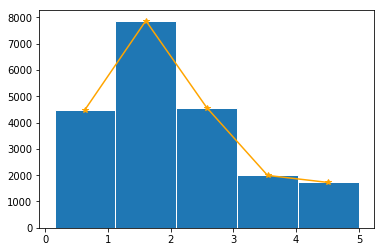

In [12]:
N, X, _ = plt.hist(train_df['target'], bins=5, ec='w') # 'ec' (edgecolors) for outline
X = 0.5*(X[1:]+ X[:-1])
_ = plt.plot(X, N, '-*', color='orange')

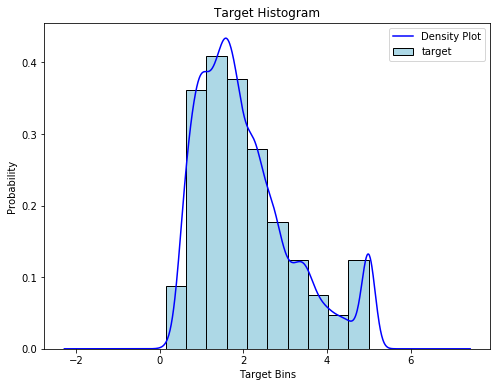

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))

train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='black')
plt.legend()
plt.title("Target Histogram")
plt.xlabel("Target Bins")
plt.ylabel("Probability");

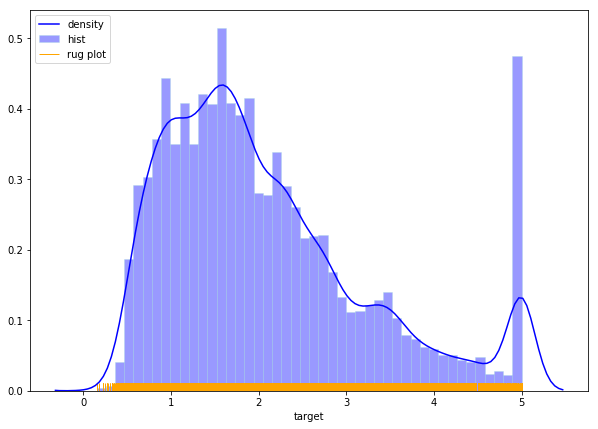

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

_ = sns.distplot(train_df['target'], rug=True, hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'}, rug_kws={'color':'orange', 'height':0.02, 'label': 'rug plot'})
plt.legend();

#### Making data talk:

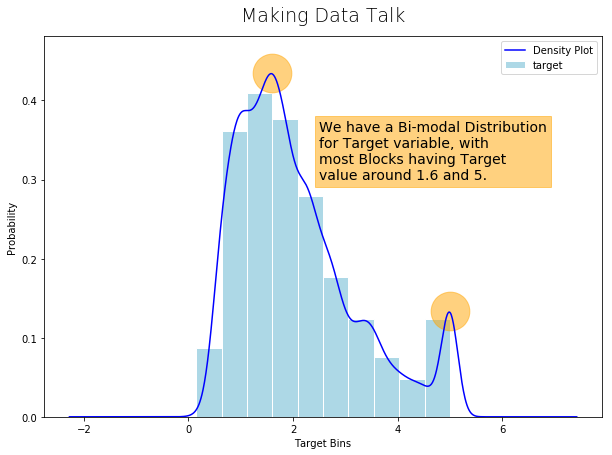

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

temp = train_df['target'].plot.kde(label="Density Plot", color='b') # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
_ = plt.hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
plt.legend()
plt.title("Making Data Talk", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
plt.xlabel("Target Bins")
plt.ylabel("Probability")
plt.text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
plt.scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)

for p in _[2]:
    p.set_zorder(0)

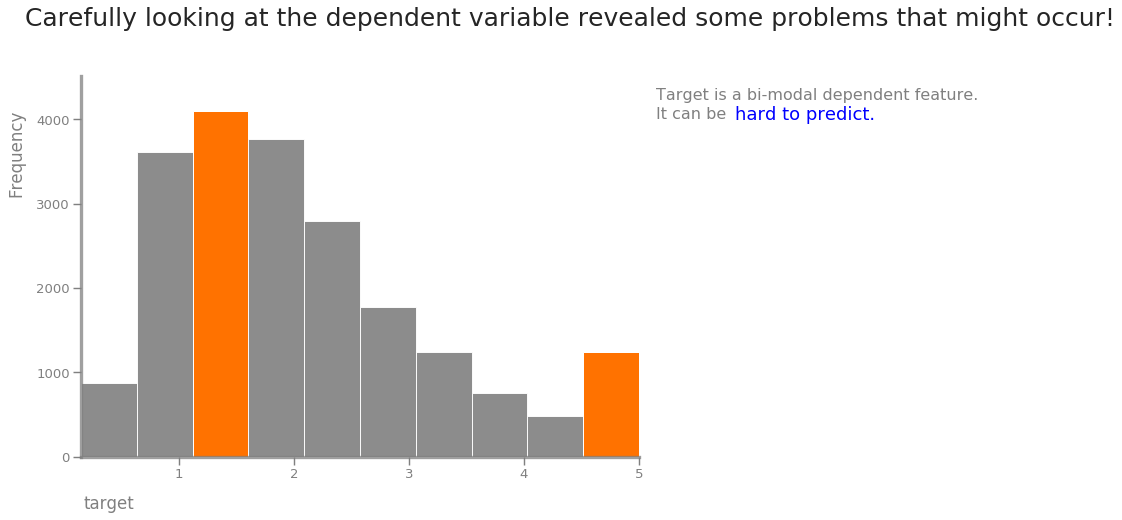

In [16]:
swm = SWMat(plt)
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5);

And likewise you can check distribution of multiple variables:

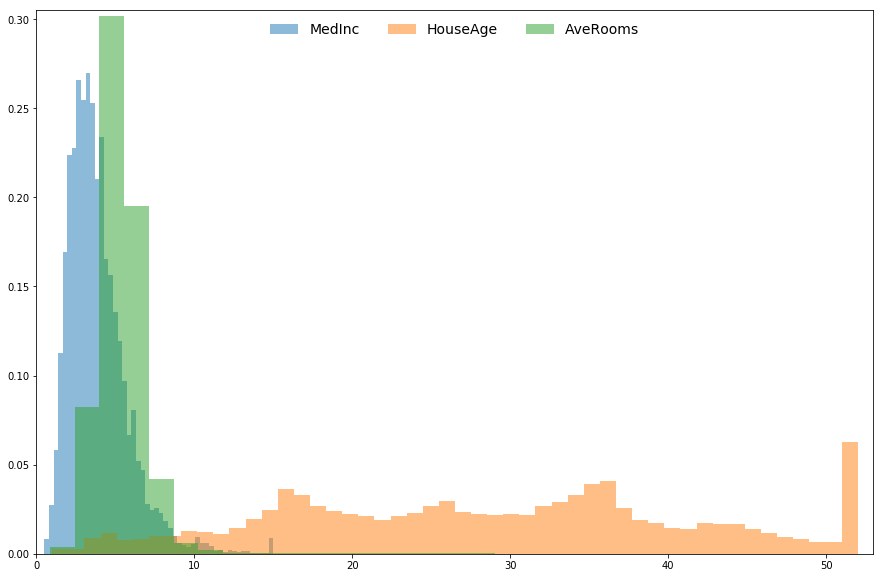

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10))

plt.hist(train_df['MedInc'], bins=50, density=True, alpha=0.5, label="MedInc")
plt.hist(train_df['HouseAge'], bins=50, density=True, alpha=0.5, label="HouseAge")
plt.hist(train_df['AveRooms'], bins=90, density=True, alpha=0.5, label="AveRooms")
plt.axis([0, 53, 0, 0.305])
plt.legend(frameon=False, loc='upper center', ncol=3, fontsize=14);

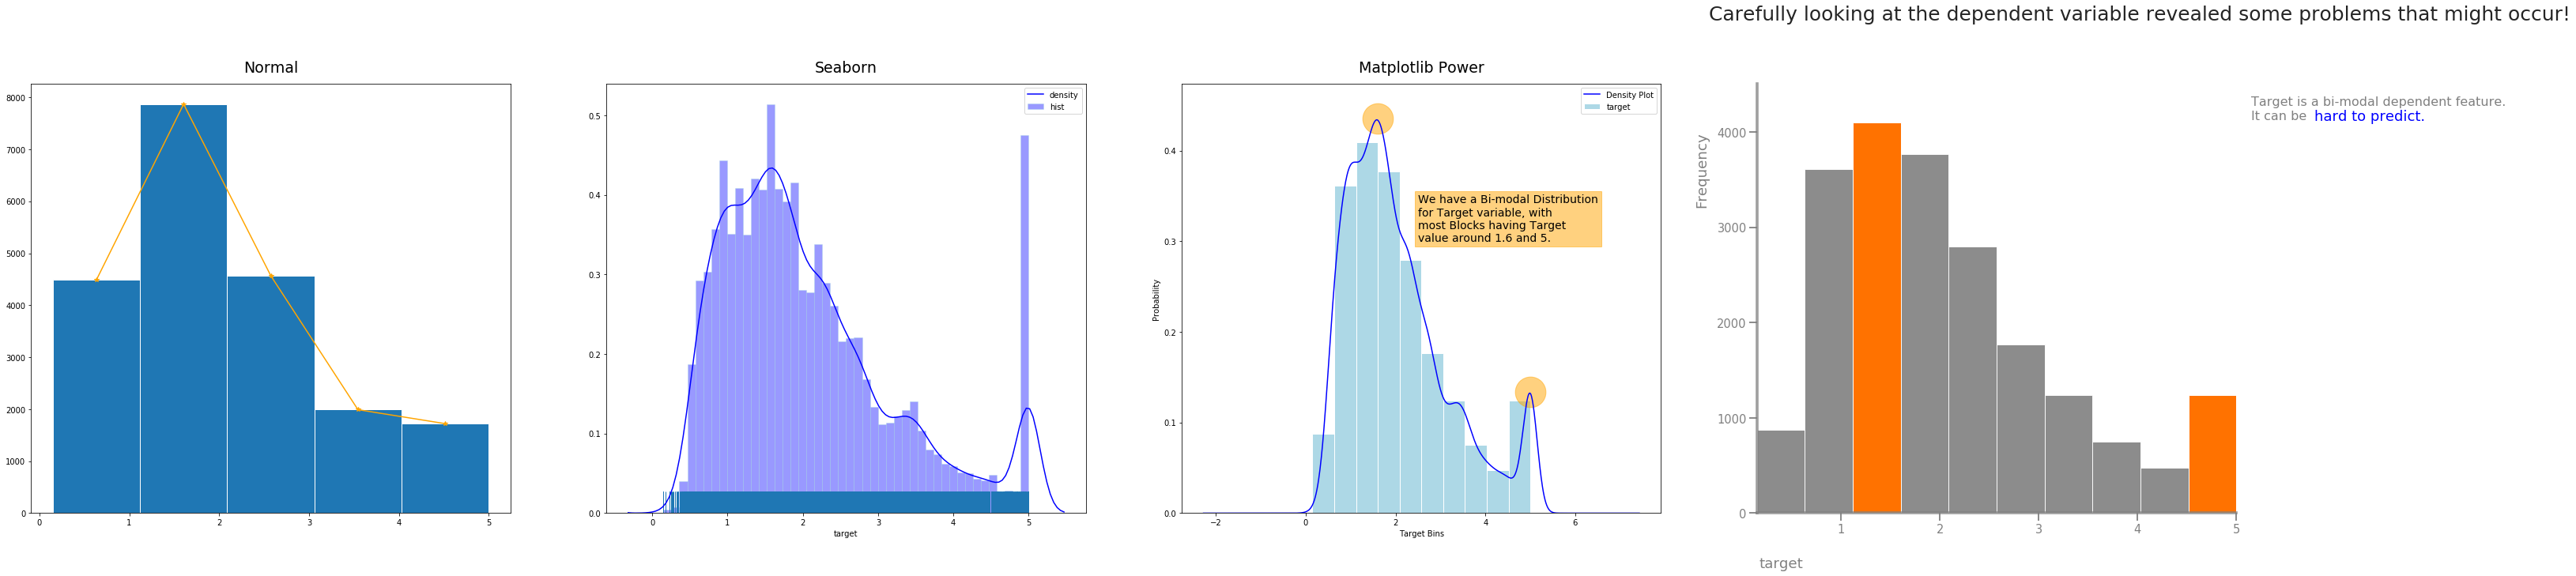

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(50, 10))

N, X, _ = axs[0].hist(train_df['target'], bins=5, ec='w')
X = 0.5*(X[1:]+ X[:-1])
axs[0].plot(X, N, '-*', color='orange')
axs[0].set_title("Normal", fontdict={'fontsize': 19}, pad=15)

sns.distplot(train_df['target'], rug=True, hist_kws={'ec':'lightblue', 'color':'blue', 'label':'hist'}, 
                 kde_kws={'color':'b', 'label':'density'}, ax=axs[1])
axs[1].legend()
axs[1].set_title("Seaborn", fontdict={'fontsize': 19}, pad=15)

train_df['target'].plot.kde(label="Density Plot", color='b', ax=axs[2]) # Or you can use gaussian_kde from scipy.stats as given here: https://realpython.com/python-histograms/
ht = axs[2].hist(train_df['target'], bins=10, color='lightblue', label='target', density=True, ec='white')
axs[2].legend()
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19}, pad=15)
axs[2].set_xlabel("Target Bins")
axs[2].set_ylabel("Probability")
axs[2].text(2.5, 0.3, "We have a Bi-modal Distribution\nfor Target variable, with\nmost Blocks having Target\nvalue around 1.6 and 5.", fontsize=14,
            bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 4})
axs[2].scatter([1.6, 5], [0.435, 0.134], s=1500, c='orange', alpha=0.5)
for p in ht[2]:
    p.set_zorder(0)
    
swm = SWMat(plt, ax=axs[3])
swm.hist(train_df['target'], bins=10, highlight=[2, 9])
swm.title("Carefully looking at the dependent variable revealed some problems that might occur!")
swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>",btw_text_dist=.5, btw_line_dist=.7);

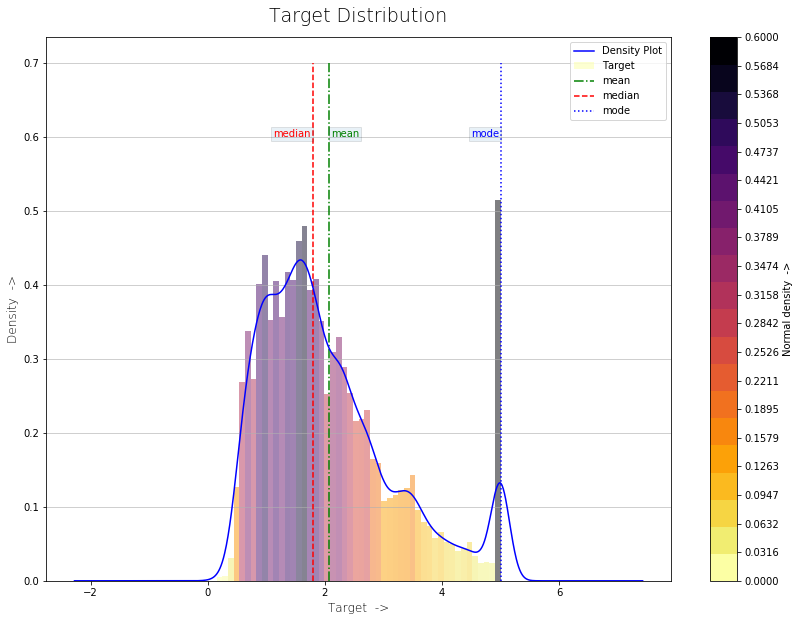

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(14, 10))

N, bins, patches = plt.hist(train_df['target'], bins=50, density=True, label="Target")
# For Density plot:
train_df['target'].plot.kde(label="Density Plot", color="b") # As we increase number of bins, our plot will look more and more like density plot

# For more on histogram with density plots look here: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# For Grid (for better mapping of heights)
plt.grid(axis='y', alpha=0.75)
# Add lines for mean, median and mode:
plt.vlines(x=train_df['target'].mean(), ymin=0, ymax=0.7, colors='green', linestyle='dashdot', label='mean')
plt.vlines(x=train_df['target'].median(), ymin=0, ymax=0.7, colors='red', linestyle='dashed', label='median')
plt.vlines(x=train_df['target'].mode(), ymin=0, ymax=0.7, colors='blue', linestyle='dotted', label='mode')
# Add text for lines above: (https://predictablynoisy.com/matplotlib/tutorials/text/text_intro.html)
plt.text(x=train_df['target'].mean()+0.03, y=0.6, s='mean', color='green', bbox={'alpha': 0.1, 'pad': 2})
plt.text(train_df['target'].median()-0.68, 0.6, 'median', color='red', bbox={'alpha': 0.1, 'pad': 2})
plt.text(train_df['target'].mode()-0.5, 0.6, 'mode', color='blue', bbox={'alpha': 0.1, 'pad': 2})

################################## For colored bins #######################################
# You can ignore this, but using this way you can map your data to a color palette.
from matplotlib import colors
norm = colors.Normalize(N.min(), N.max()) # For mapping whole range values to a colorbar.

for freq, thispatch in zip(N, patches):
    color = plt.cm.inferno_r(norm(freq), alpha=0.85) # Pick a color from a palette (here, inferno_r) based on a value between [0, 1]
    thispatch.set_facecolor(color) # set color of current patch
    thispatch.set_alpha(0.5)
# From here: https://matplotlib.org/gallery/statistics/hist.html
##################################     End (1)     ########################################

plt.legend()
plt.xlabel("Target  ->", fontdict={'fontsize': 12,'fontweight': 5})
plt.ylabel("Density  ->", fontdict={'fontsize': 12,'fontweight': 5})
plt.title("Target Distribution", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

## Adding colorbar: (you can ignore this too)
# Form here: https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object
import matplotlib as mpl
cmap = plt.get_cmap('inferno_r', 20)
norm = mpl.colors.Normalize(vmin=0,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # colorbar needs a Mappable. Contour, Scatter and hist2d gives them by default. There you can simply call plt.colorbar()
sm.set_array([])
cb = plt.colorbar(sm, ticks=np.linspace(0,0.6,20))
cb.set_label("Normal density  ->");

# 3) Relational Plots

## a) Line Plot (+ Scatter):

### Line Plot:

There are only two variables whose relationship is nearly linear. And they are "AveRooms" and "AveBedrms". And it is obvious.

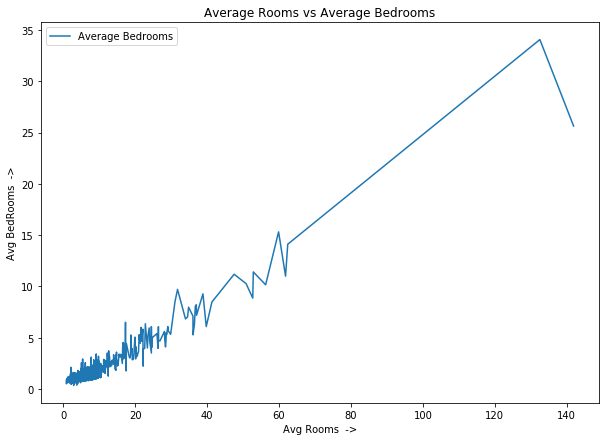

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), label="Average Bedrooms")

plt.legend()
plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

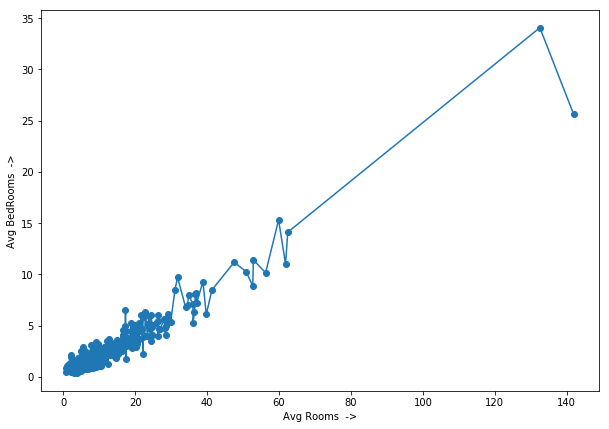

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df)
plt.plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'))

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

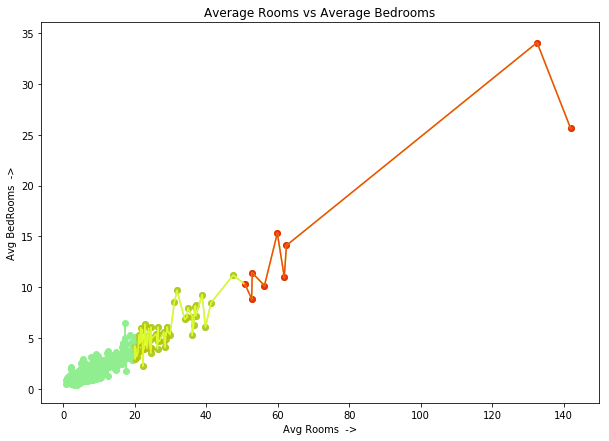

In [22]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sorted_df = train_df.sort_values('AveRooms')

plt.scatter('AveRooms', 'AveBedrms', data=train_df, c='lightgreen')
plt.scatter('AveRooms', 'AveBedrms', data=train_df[(train_df['AveRooms']>20)], c='y', alpha=0.7)
plt.scatter('AveRooms', 'AveBedrms', data=train_df[(train_df['AveRooms']>50)], c='r', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen')
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7)


plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

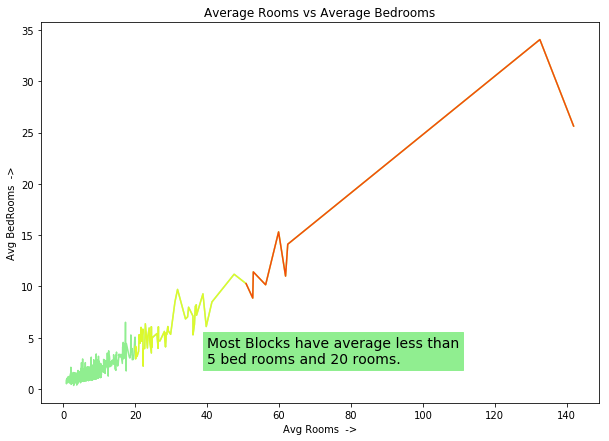

In [23]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sorted_df = train_df.sort_values('AveRooms')

plt.plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen')
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7)
plt.plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7)

# Adding text:
plt.text(40, 2.5, "Most Blocks have average less than\n5 bed rooms and 20 rooms.", fontsize=14,
        bbox={'facecolor': 'lightgreen', 'edgecolor': 'lightgreen', 'pad': 4})

plt.title("Average Rooms vs Average Bedrooms")
plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->");

### Making Data Talk:

In [24]:
sorted_df = train_df.sort_values('AveRooms', na_position='first').reset_index(drop=True) # reset is necessary, otherwise original Series will be passed.

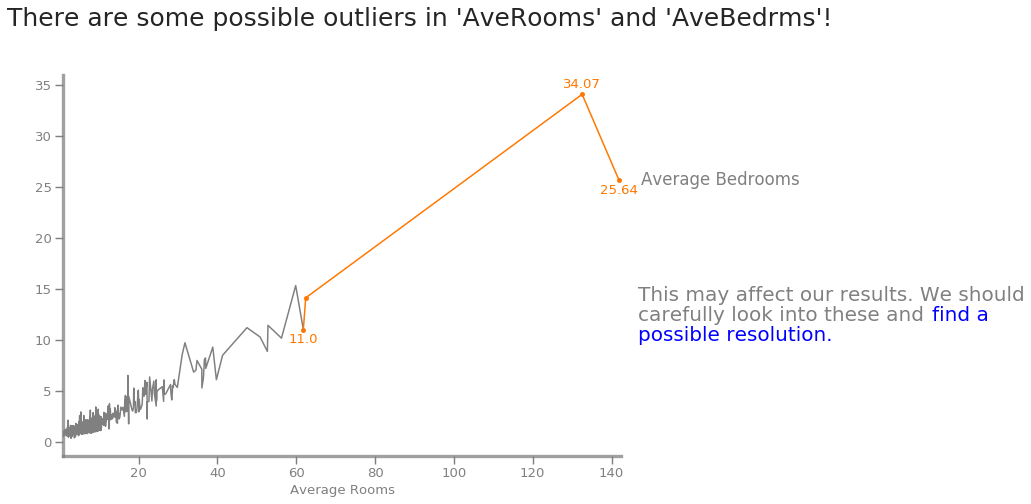

In [25]:
swm = SWMat(plt)

swm.line_plot(sorted_df['AveRooms'], sorted_df['AveBedrms'], line_labels=["Average Bedrooms"], highlight=0, 
              label_points_after=60, xlabel="Average Rooms", highlight_label_region_only=True, point_label_dist=0.9)
swm.title("There are some possible outliers in 'AveRooms' and 'AveBedrms'!", ttype="title+")
swm.text("This may affect our results. We should\ncarefully look into these and <prop color='blue'>find a\n possible resolution.<\prop>", 
         position="out-mid-right", fontsize=20, btw_line_dist=2.5, btw_text_dist=2);

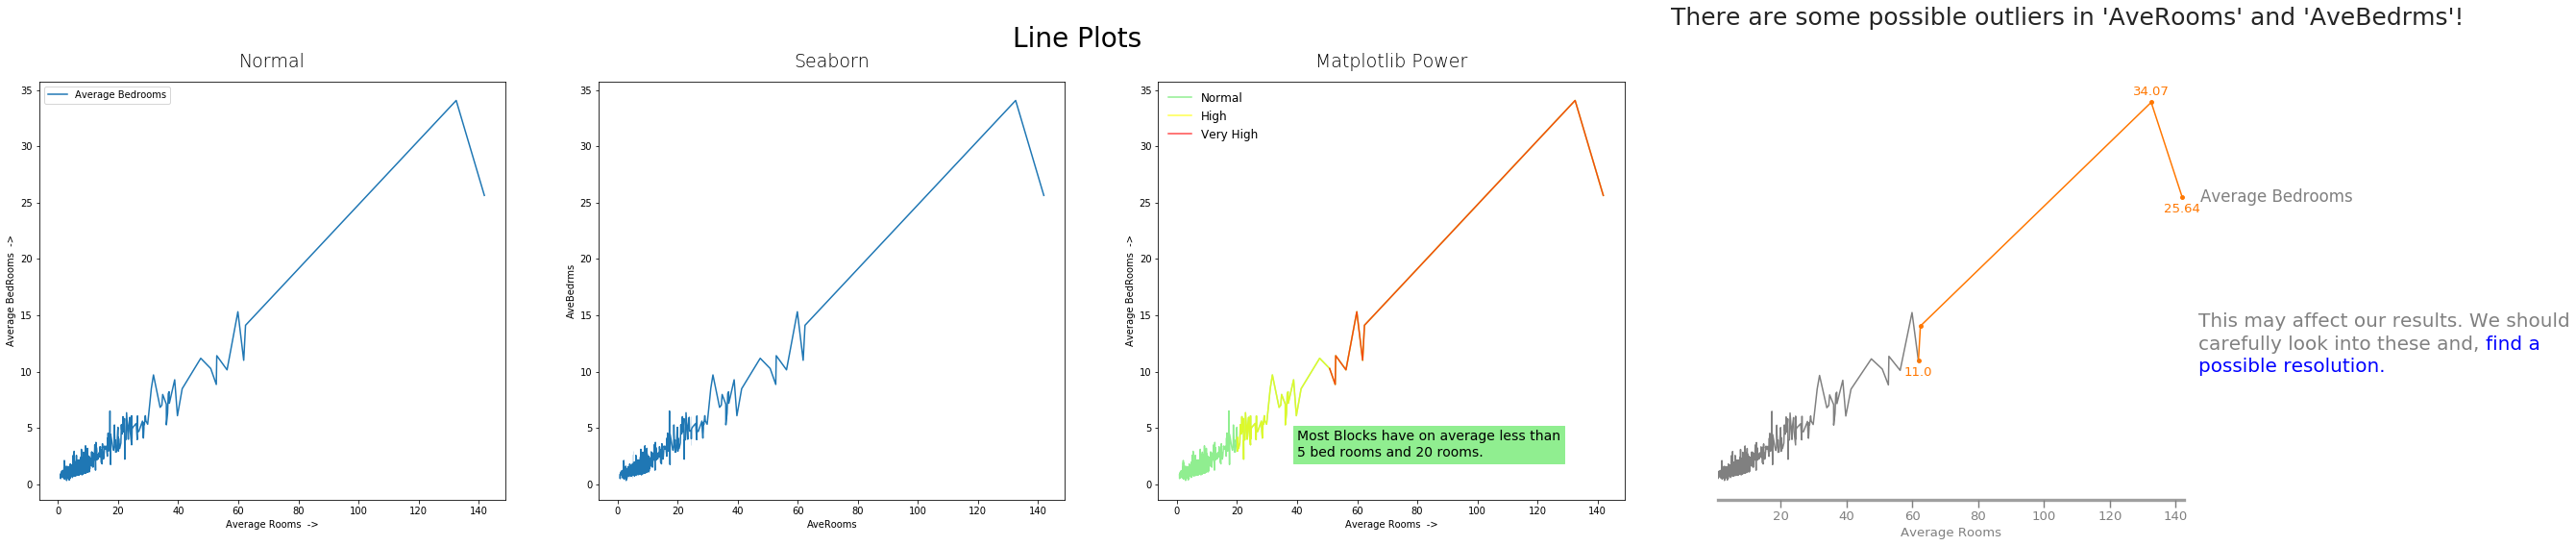

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Line Plots", fontsize=28)

axs[0].plot('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), label="Average Bedrooms")
axs[0].legend()
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Average Rooms  ->")
axs[0].set_ylabel("Average BedRooms  ->")

sns.lineplot(x='AveRooms', y='AveBedrms', data=train_df, ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

a = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df, c='lightgreen', label = "Normal")
b = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>20)], c='yellow', alpha=0.7, label="High")
c = axs[2].plot('AveRooms', 'AveBedrms', data=sorted_df[(sorted_df['AveRooms']>50)], c='red', alpha=0.7, label="Very High")
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
########################### Adding manual legends ########################################
axs[2].legend(handles=[a[0], b[0], c[0]], ncol=1, frameon=False, fontsize='large')
##########################################################################################
axs[2].text(40, 2.5, "Most Blocks have on average less than\n5 bed rooms and 20 rooms.", fontsize=14,
        bbox={'facecolor': 'lightgreen', 'edgecolor': 'lightgreen', 'pad': 4})
axs[2].set_xlabel("Average Rooms  ->")
axs[2].set_ylabel("Average BedRooms  ->")

swm = SWMat(plt, ax=axs[3])

swm.line_plot(sorted_df['AveRooms'], sorted_df['AveBedrms'], line_labels=["Average Bedrooms"], highlight=0, label_points_after=60,
            xlabel="Average Rooms", highlight_label_region_only=True, point_label_dist=0.9, hide_y=True)
swm.title("There are some possible outliers in 'AveRooms' and 'AveBedrms'!", ttype="title+")
swm.text("This may affect our results. We should\ncarefully look into these and, <prop color='blue'>find a\n possible resolution.<\prop>", 
         position="out-mid-right", fontsize=20, btw_line_dist=2.5, btw_text_dist=2);

But this doesn't look that good. What can we do?

### Scatter Plot (1):

In [27]:
# For fitting a linear line:
from numpy.polynomial.polynomial import polyfit

const, slope = polyfit(train_df['AveRooms'], train_df['AveBedrms'], deg=1)
Y = train_df['AveRooms']*slope + const

For more info look [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html).

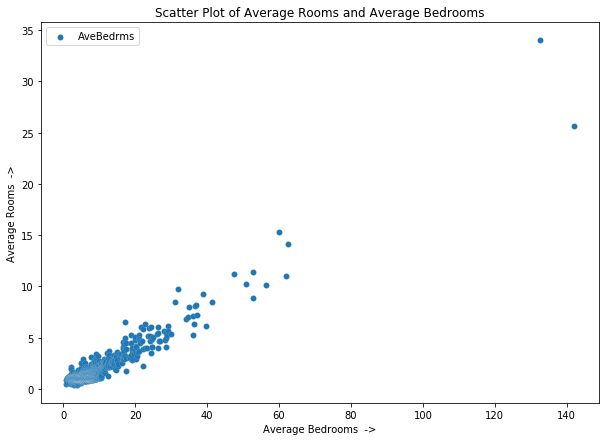

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.1)

plt.legend()
plt.title("Scatter Plot of Average Rooms and Average Bedrooms")
plt.xlabel("Average Bedrooms  ->")
plt.ylabel("Average Rooms  ->");

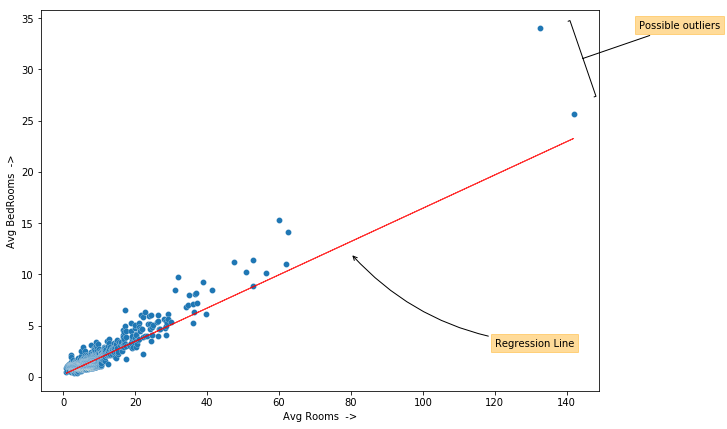

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidth=0.2)
plt.plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->")

# Adding annotations:
plt.annotate("Possible outliers", xy=(144, 31), xytext=(160, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

plt.annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
plt.show()

We can also add confidence interval region for our regression line. We can get confidence interval for our regression like using sklearn's GaussianProcess method. (look [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html))

In [30]:
sample = train_df.sample(frac=0.5) # Gaussian Process taking too much memory...

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp = GaussianProcessRegressor()

In [32]:
%%time

print("Fitting...")
gp.fit(sample['AveRooms'].values.reshape(-1, 1), sample['AveBedrms'].values)
print("Fitting Complete.")

print("Predicting...")
x = np.linspace(0, 145, 146)
preds, std = gp.predict(x.reshape(-1, 1), return_std=True)
print("Predicted.")

# For 95% confidence interval:
delta = 1.96*std

Fitting...
Fitting Complete.
Predicting...
Predicted.
CPU times: user 2min 31s, sys: 9.2 s, total: 2min 40s
Wall time: 1min 10s


In [33]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'))#, edgecolors='w')
plt.plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)

plt.xlabel("Avg Rooms  ->")
plt.ylabel("Avg BedRooms  ->")

# Adding annotations:
plt.annotate("Possible outliers", xy=(144, 31), xytext=(160, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

plt.annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})

# For confidence interval:
plt.fill_between(x, preds-delta, preds+delta, color='gray', alpha=0.4)
plt.ylim(0, 35);

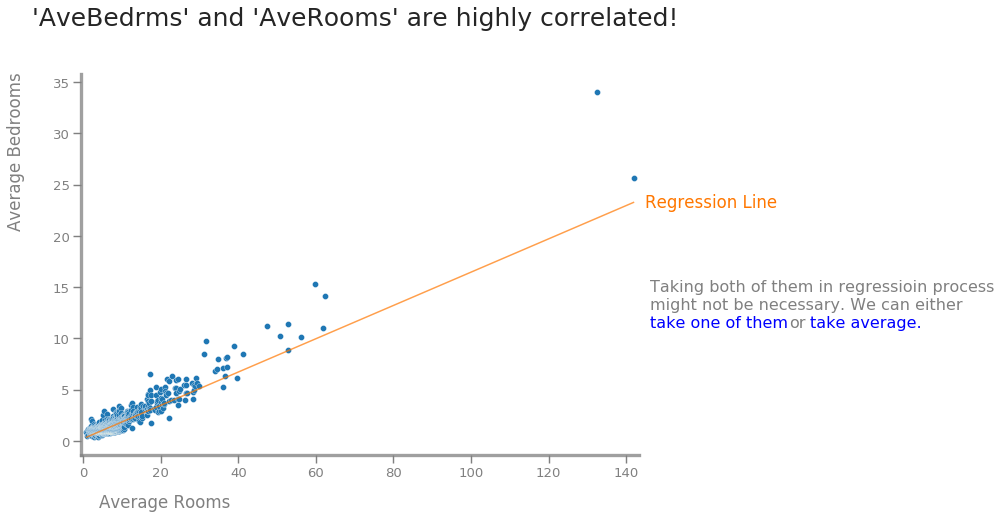

In [34]:
swm = SWMat(plt)
plt.scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
swm.line_plot(train_df['AveRooms'], Y, highlight=0, alpha=0.7, line_labels=["Regression Line"])
swm.title("'AveBedrms' and 'AveRooms' are highly correlated!", ttype="title+")
swm.text("Taking both of them in regressioin process\nmight not be necessary. We can either\n<prop color='blue'>take one of them</prop> or <prop color='blue'>take average.</prop>",
         position='out-mid-right', btw_line_dist=5)
swm.axis(labels=["Average Rooms", "Average Bedrooms"])

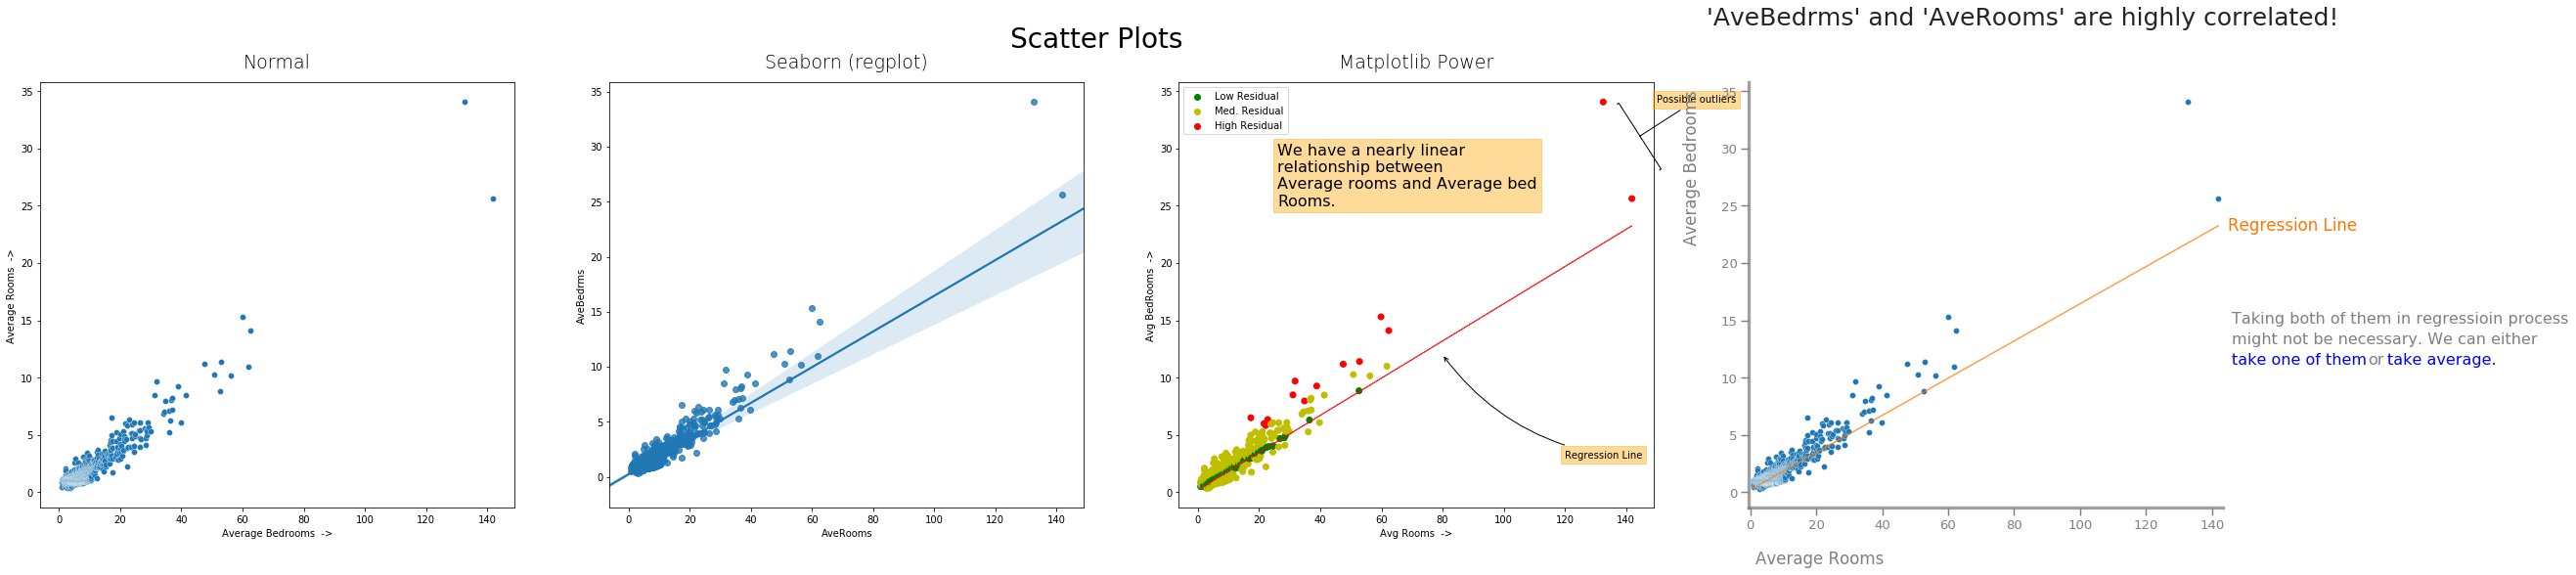

In [35]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Scatter Plots", fontsize=28)

axs[0].scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Average Bedrooms  ->")
axs[0].set_ylabel("Average Rooms  ->")

sns.regplot(x='AveRooms', y='AveBedrms', data=train_df, label="Average Bedrooms", ax=axs[1])
axs[1].set_title("Seaborn (regplot)", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)

##################### For colors in scatter plot #################################
diff = (train_df['AveBedrms'] - Y).abs()
colors = []
for i in range(len(diff)):
  if diff[i] <= 0.17: colors.append('g')
  elif diff[i] > 0.17 and diff[i] <= 2: colors.append('y')
  else: colors.append('r')
train_df['colors'] = colors
sorted_df = train_df.sort_values('AveRooms')
##################################################################################
sct = axs[2].scatter('AveRooms', 'AveBedrms', data=sorted_df, c=sorted_df['colors'])
del train_df['colors']
axs[2].plot(train_df['AveRooms'], Y, linewidth=1, color='red', linestyle='-', alpha=0.8)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Avg Rooms  ->")
axs[2].set_ylabel("Avg BedRooms  ->")
###################### Setting legend manually ###################################
one = axs[2].scatter([], [], c='g', label='Low Residual')
two = axs[2].scatter([], [], c='y', label='Med. Residual')
three = axs[2].scatter([], [], c='r', label='High Residual')
axs[2].legend(handles=[one, two, three],)
##################################################################################
# Adding annotations:
axs[2].annotate("Possible outliers", xy=(144, 31), xytext=(150, 34),
             arrowprops={'arrowstyle':'-[,widthB=4.0', 'color': 'black'},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
axs[2].annotate("Regression Line", xy=(80, 12), xytext=(120, 3),
             arrowprops={'arrowstyle':'->', 'color': 'black', "connectionstyle":"arc3,rad=-0.2"},
             bbox={'pad':4, 'edgecolor':'orange', 'facecolor':'orange', 'alpha':0.4})
axs[2].text(26, 25, "We have a nearly linear\nrelationship between\nAverage rooms and Average bed\nRooms.", fontsize=16,
           bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'pad': 4, 'alpha': 0.4});


swm = SWMat(plt, ax=axs[3])
axs[3].scatter('AveRooms', 'AveBedrms', data=train_df.sort_values('AveRooms'), edgecolors='w', linewidths=0.3)
swm.line_plot(train_df['AveRooms'], Y, highlight=0, alpha=0.7, line_labels=["Regression Line"])
swm.title("'AveBedrms' and 'AveRooms' are highly correlated!", ttype="title+")
swm.text("Taking both of them in regressioin process\nmight not be necessary. We can either\n<prop color='blue'>take one of them</prop> or <prop color='blue'>take average.</prop>",
         position='out-mid-right', btw_line_dist=5)
swm.axis(labels=["Average Rooms", "Average Bedrooms"])

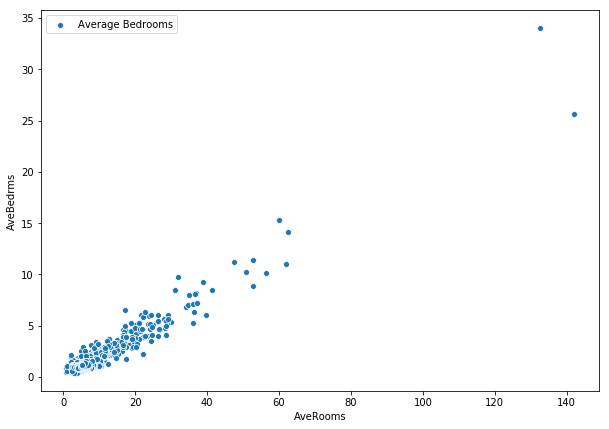

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

#sns.lineplot(x='AveRooms', y='AveBedrms', data=train_df)
sns.scatterplot(x='AveRooms', y='AveBedrms', data=train_df, label="Average Bedrooms");

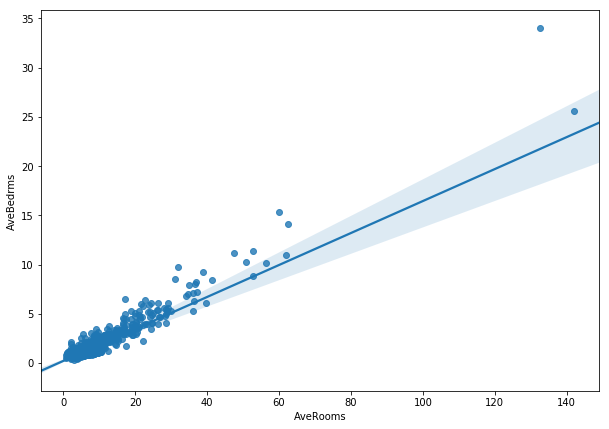

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.regplot('AveRooms', 'AveBedrms', data=train_df);

In [38]:
train_df['target_int'] = train_df['target']
train_df.loc[(train_df['target'] < 1), 'target_int'] = 0
train_df.loc[(train_df['target'] >= 1) & (train_df['target'] < 2), 'target_int'] = 1
train_df.loc[(train_df['target'] >= 2) & (train_df['target'] < 3), 'target_int'] = 2
train_df.loc[(train_df['target'] >=3) & (train_df['target'] < 4), 'target_int'] = 3
train_df.loc[(train_df['target'] >= 4), 'target_int'] = 4

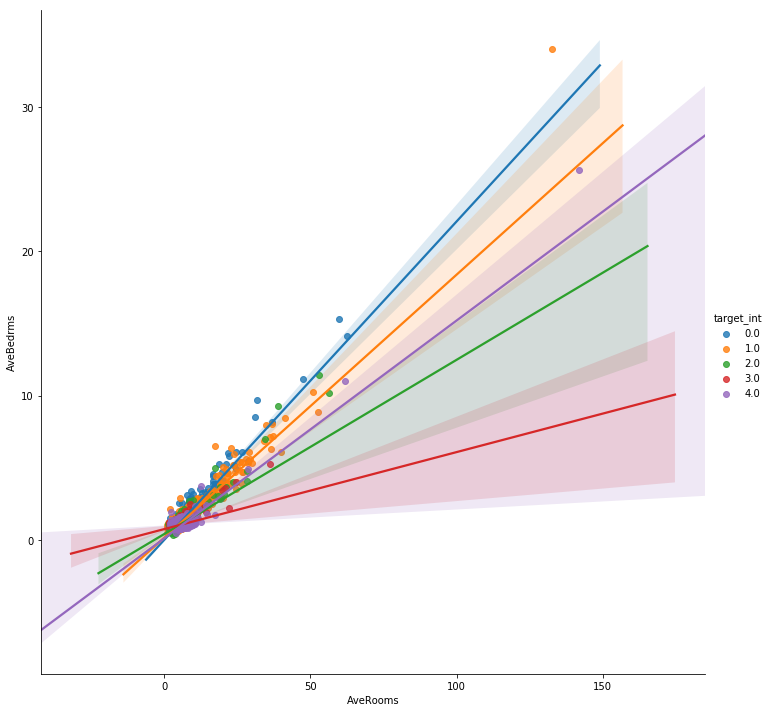

In [39]:
sns.lmplot('AveRooms', 'AveBedrms', hue='target_int', data=train_df, height=10); # There are many options available here, like row, col etc. You should look into them.

In [40]:
del train_df['target_int']

## b) Scatter Plot:

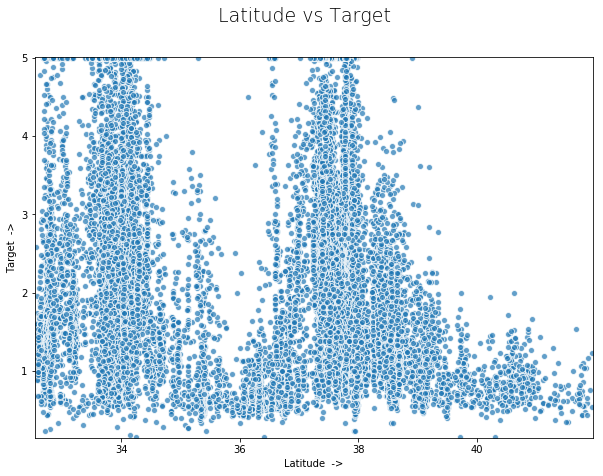

In [41]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))


plt.scatter('Latitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.margins(0)
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.xlabel('Latitude  ->')
plt.ylabel('Target  ->');

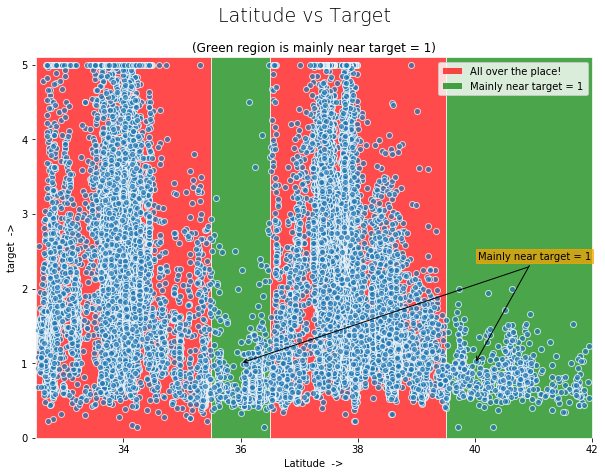

In [42]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# For filling regions:
plt.fill_betweenx([0, 5.1], x1=32.5, x2=35.5, facecolor='red', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=35.5, x2=36.5, facecolor='green', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=36.5, x2=39.5, facecolor='red', alpha=0.7, edgecolor='w',)
plt.fill_betweenx([0, 5.1], x1=39.5, x2=42, facecolor='green', alpha=0.7, edgecolor='w')

# Arrow message:
plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
            arrowprops=dict(arrowstyle='->', facecolor='black'),
            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter('Latitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.box(False)
plt.margins(0)
plt.legend(['All over the place!', 'Mainly near target = 1'])
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Latitude  ->')
plt.ylabel('target  ->');

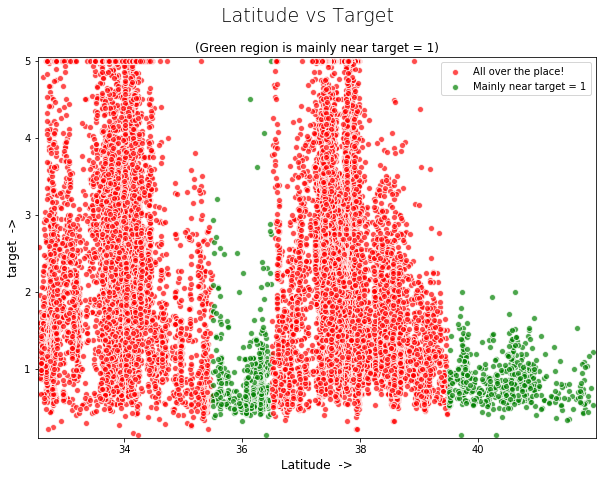

In [43]:
# Or you could have done something like this:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# Arrow message:
#plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
#            arrowprops=dict(arrowstyle='->', facecolor='black'),
#            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
#plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
#            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter(train_df.loc[(train_df['Latitude']<35.5), 'Latitude'], train_df.loc[(train_df['Latitude']<35.5), 'target'], edgecolors='w', alpha=0.7, c='red')
plt.scatter(train_df.loc[(train_df['Latitude']>=35.5) & (train_df['Latitude']<36.5), 'Latitude'], 
            train_df.loc[(train_df['Latitude']>=35.5) & (train_df['Latitude']<36.5), 'target'], 
            edgecolors='w', alpha=0.7, c='green')
plt.scatter(train_df.loc[(train_df['Latitude']>=36.5) & (train_df['Latitude']<39.5), 'Latitude'], 
            train_df.loc[(train_df['Latitude']>=36.5) & (train_df['Latitude']<39.5), 'target'], 
            edgecolors='w', alpha=0.7, c='red')
plt.scatter(train_df.loc[(train_df['Latitude']>39.5), 'Latitude'], train_df.loc[(train_df['Latitude']>39.5), 'target'], edgecolors='w', alpha=0.7, c='green')

plt.margins(0)
plt.legend(['All over the place!', 'Mainly near target = 1'])
plt.suptitle("Latitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Latitude  ->', fontsize=12)
plt.ylabel('target  ->', fontsize=12);

We can do the same with Latitude vs Longitude:

Here we will use the first one because that is more clear, I think.

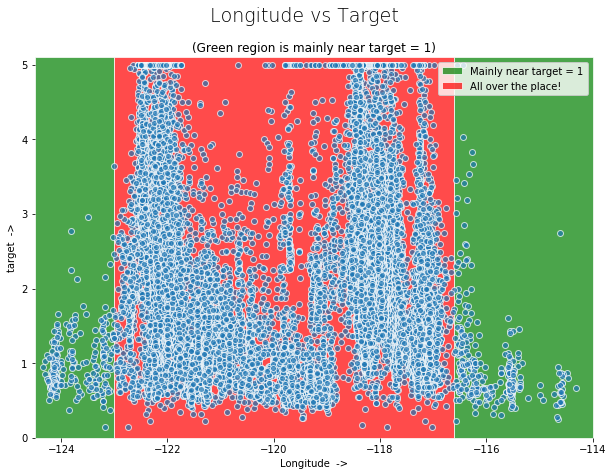

In [44]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# For filling regions:
plt.fill_betweenx([0, 5.1], x1=-124.5, x2=-123, facecolor='green', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=-123, x2=-116.6, facecolor='red', alpha=0.7, edgecolor='w')
#plt.fill_betweenx([0, 5.1], x1=-121.5, x2=-120, facecolor='green', alpha=0.7, edgecolor='w')
#plt.fill_betweenx([0, 5.1], x1=-120, x2=-116.6, facecolor='red', alpha=0.7, edgecolor='w')
plt.fill_betweenx([0, 5.1], x1=-116.6, x2=-114, facecolor='green', alpha=0.7, edgecolor='w')

# Arrow message:
#plt.annotate("Mainly near target = 1", xy=(40, 1), xytext=(40.05, 2.5),
#            arrowprops=dict(arrowstyle='->', facecolor='black'),
#            verticalalignment='top', bbox={'facecolor':'orange', 'alpha':0.7, 'pad':2, 'edgecolor': 'orange'})
#plt.annotate("", xy=(36, 1), xytext=(40.95, 2.3),
#            arrowprops=dict(arrowstyle='->', facecolor='black'))

plt.scatter('Longitude', 'target', data=train_df, edgecolors='w', alpha=0.7)

plt.box(False)
plt.margins(0)
plt.legend(['Mainly near target = 1', 'All over the place!'])
plt.suptitle("Longitude vs Target", fontsize=19, fontweight=0.5)
plt.title("(Green region is mainly near target = 1)", pad=6)
plt.xlabel('Longitude  ->')
plt.ylabel('target  ->');

Because Latitude and Longitude goes hand in hand, we should look at them together, so we can plot something like this:

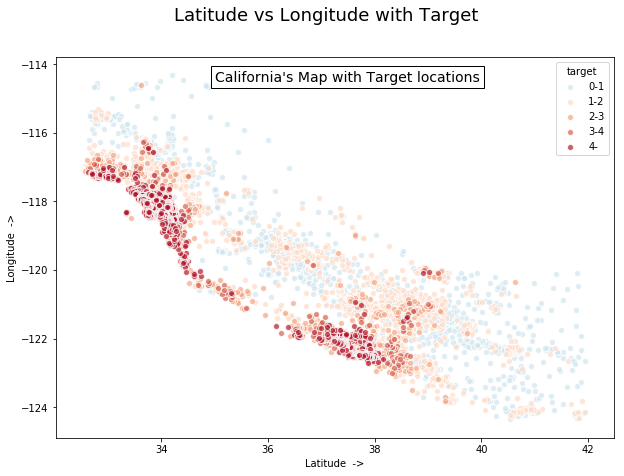

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

# Colors from RdBu palette
plt.scatter(train_df.loc[(train_df['target']<1), 'Latitude'], train_df.loc[(train_df['target']<1), 'Longitude'], c='#D1E5F0', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=1) & (train_df['target']<2), 'Latitude'], 
            train_df.loc[(train_df['target']>=1) & (train_df['target']<2), 'Longitude'], c='#FDDBC7', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=2) & (train_df['target']<3), 'Latitude'], 
            train_df.loc[(train_df['target']>=2) & (train_df['target']<3), 'Longitude'], c='#F4A582', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=3) & (train_df['target']<4), 'Latitude'], 
            train_df.loc[(train_df['target']>=3) & (train_df['target']<4), 'Longitude'], c='#D6604D', alpha=0.7, edgecolors='w')
plt.scatter(train_df.loc[(train_df['target']>=4), 'Latitude'], train_df.loc[(train_df['target']>=4), 'Longitude'], c='#B2182B', alpha=0.7, edgecolors='w');

# Text:
plt.text(x=35, y=-114.5, s="California's Map with Target locations", fontsize=14, bbox={'facecolor': 'white'})

plt.suptitle("Latitude vs Longitude with Target", fontsize=18)
plt.legend(["0-1", "1-2", "2-3", "3-4", "4-"], title='target')
plt.xlabel("Latitude  ->")
plt.ylabel("Longitude  ->");

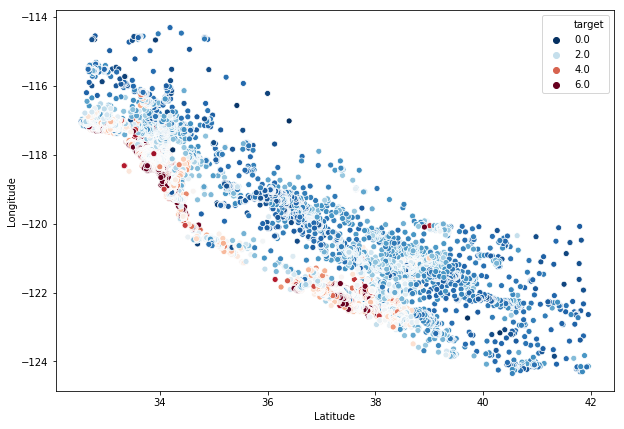

In [46]:
# This one is easy with seaborn:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

_ = sns.scatterplot('Latitude', 'Longitude', hue='target', data=train_df, palette="RdBu_r")

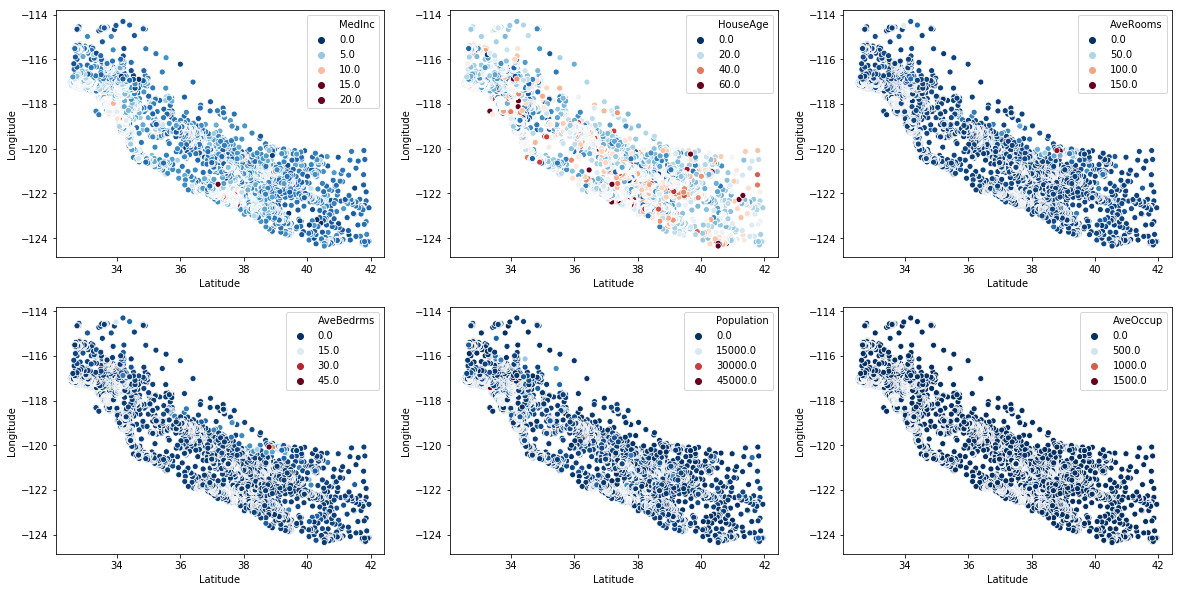

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

_ = sns.scatterplot('Latitude', 'Longitude', hue='MedInc', data=train_df, palette="RdBu_r", ax=axs[0][0])
_ = sns.scatterplot('Latitude', 'Longitude', hue='HouseAge', data=train_df, palette="RdBu_r", ax=axs[0][1])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveRooms', data=train_df, palette="RdBu_r", ax=axs[0][2])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveBedrms', data=train_df, palette="RdBu_r", ax=axs[1][0])
_ = sns.scatterplot('Latitude', 'Longitude', hue='Population', data=train_df, palette="RdBu_r", ax=axs[1][1])
_ = sns.scatterplot('Latitude', 'Longitude', hue='AveOccup', data=train_df, palette="RdBu_r", ax=axs[1][2])

## c) 2d-Hist and Contour Plots:

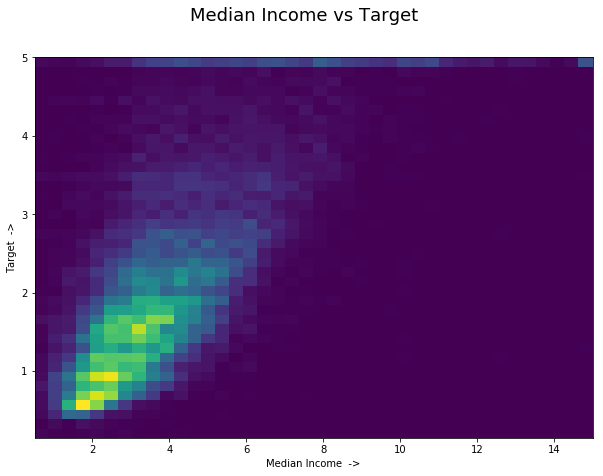

In [48]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.hist2d('MedInc', 'target', bins=40, data=train_df)
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18);

For more cmap's you can look [here](https://matplotlib.org/users/colormaps.html).

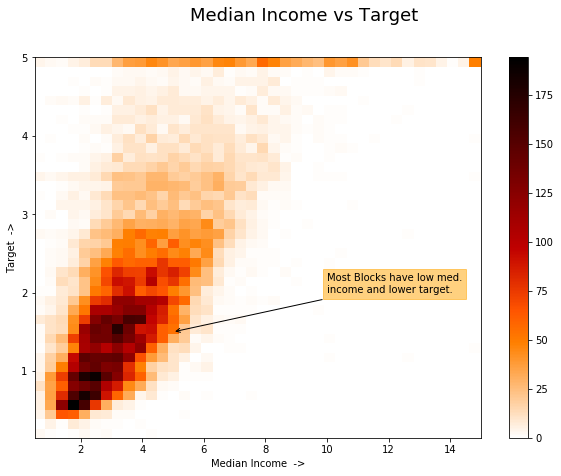

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
 
plt.hist2d('MedInc', 'target', bins=40, data=train_df, cmap='gist_heat_r') 
plt.colorbar()
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18)

# Adding annotations:
plt.annotate("Most Blocks have low med.\nincome and lower target.", xy=(5, 1.5), xytext=(10, 2),
             arrowprops={'arrowstyle': '->', 'color': 'k'},
             bbox={'facecolor': 'orange', 'pad':4, 'alpha': 0.5, 'edgecolor': 'orange'});

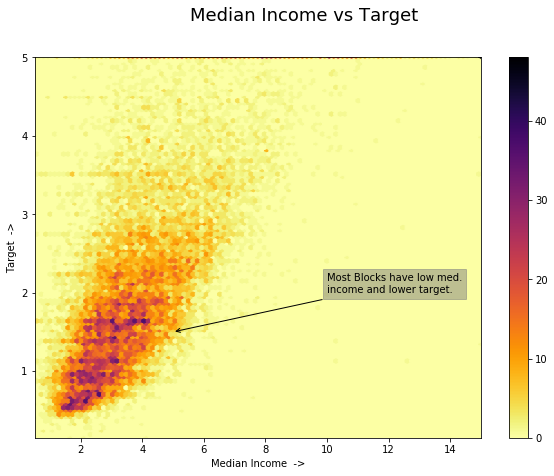

In [50]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.hexbin('MedInc', 'target', data=train_df, alpha=1.0, cmap="inferno_r")

plt.margins(0)
plt.colorbar()
plt.xlabel('Median Income  ->')
plt.ylabel('Target  ->')
plt.suptitle("Median Income vs Target", fontsize=18)

# Adding annotations:
plt.annotate("Most Blocks have low med.\nincome and lower target.", xy=(5, 1.5), xytext=(10, 2),
             arrowprops={'arrowstyle': '->', 'color': 'k'},
             bbox={'facecolor': 'gray', 'pad':4, 'alpha': 0.5, 'edgecolor': 'gray'});

#### Contour plots:

Contour plots are mainly used for visualizing a 3D or 4D **function** on 2D or 3D graph.

We don't have a function for our *target*, but we can still make a contour plot like this:

We will first make our variable's values considerable and convert them to integers, as we will be using these values as indexs in an array (which we will plot as contour).

In [51]:
# For indexing in array(np.round) and size considerations(np.log):
medi_min = np.round(train_df['MedInc']).min()
medi_max = np.round(train_df['MedInc']).max()
pop_min = np.round(np.log(train_df['Population'])).min()
pop_max = np.round(np.log(train_df['Population'])).max()
medi_min, medi_max, pop_min, pop_max

(0.0, 15.0, 1.0, 10.0)

We are going to make a 2D array and for point in dataframe we will matrix value of that location to average of all target values for that point.

In [52]:
Z = np.zeros((16, 10)) # (medi_max+1, pop_max)
counts = np.zeros((16, 10))

for i in range(len(train_df)):
  a = np.round(train_df.iloc[i,]['MedInc']).astype(np.int)
  b = np.round(np.log(train_df.iloc[i,]['Population'])).astype(np.int)
  Z[a][b-1] += train_df.iloc[i,]['target'] # Addding all values of *target* for this point
  counts[a][b-1] += 1 # Keeping a count of number of points for every location
  
Z = Z/counts # taking average

There are two types of contour methods available: `plt.contour()` and `plt.contourf()`. First one is for leveled contour and second one is for filled contour. We are using filled contour here.

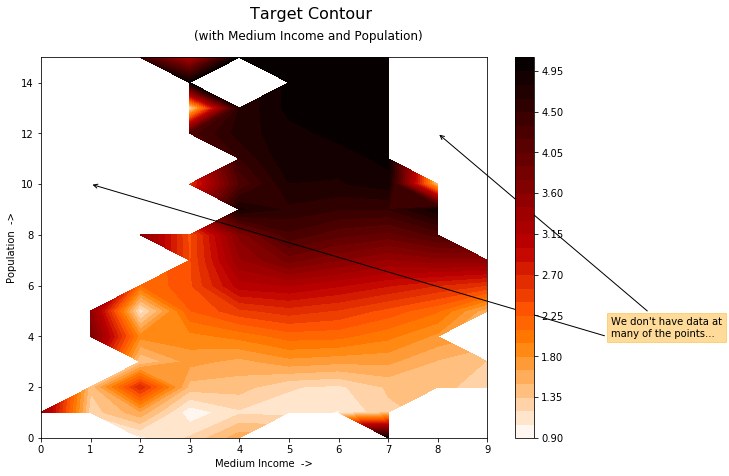

In [53]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.contourf(Z, levels=30, cmap="gist_heat_r")
plt.colorbar()

plt.suptitle("Target Contour", fontsize=16)
plt.title("(with Medium Income and Population)", position=(0.6, 1.03))
plt.xlabel("Medium Income  ->")
plt.ylabel("Population  ->")

# Adding Annotation:
plt.annotate("We don't have data at\nmany of the points...", xy=(8, 12), xytext=(11.5, 4),
             arrowprops={'arrowstyle':'->', 'color':'k'},
             bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha': 0.4, 'pad': 4})
plt.annotate("", xy=(1, 10), xytext=(11.4, 4),
             arrowprops={'arrowstyle':'->', 'color':'k'});

## d) Pair Plot:

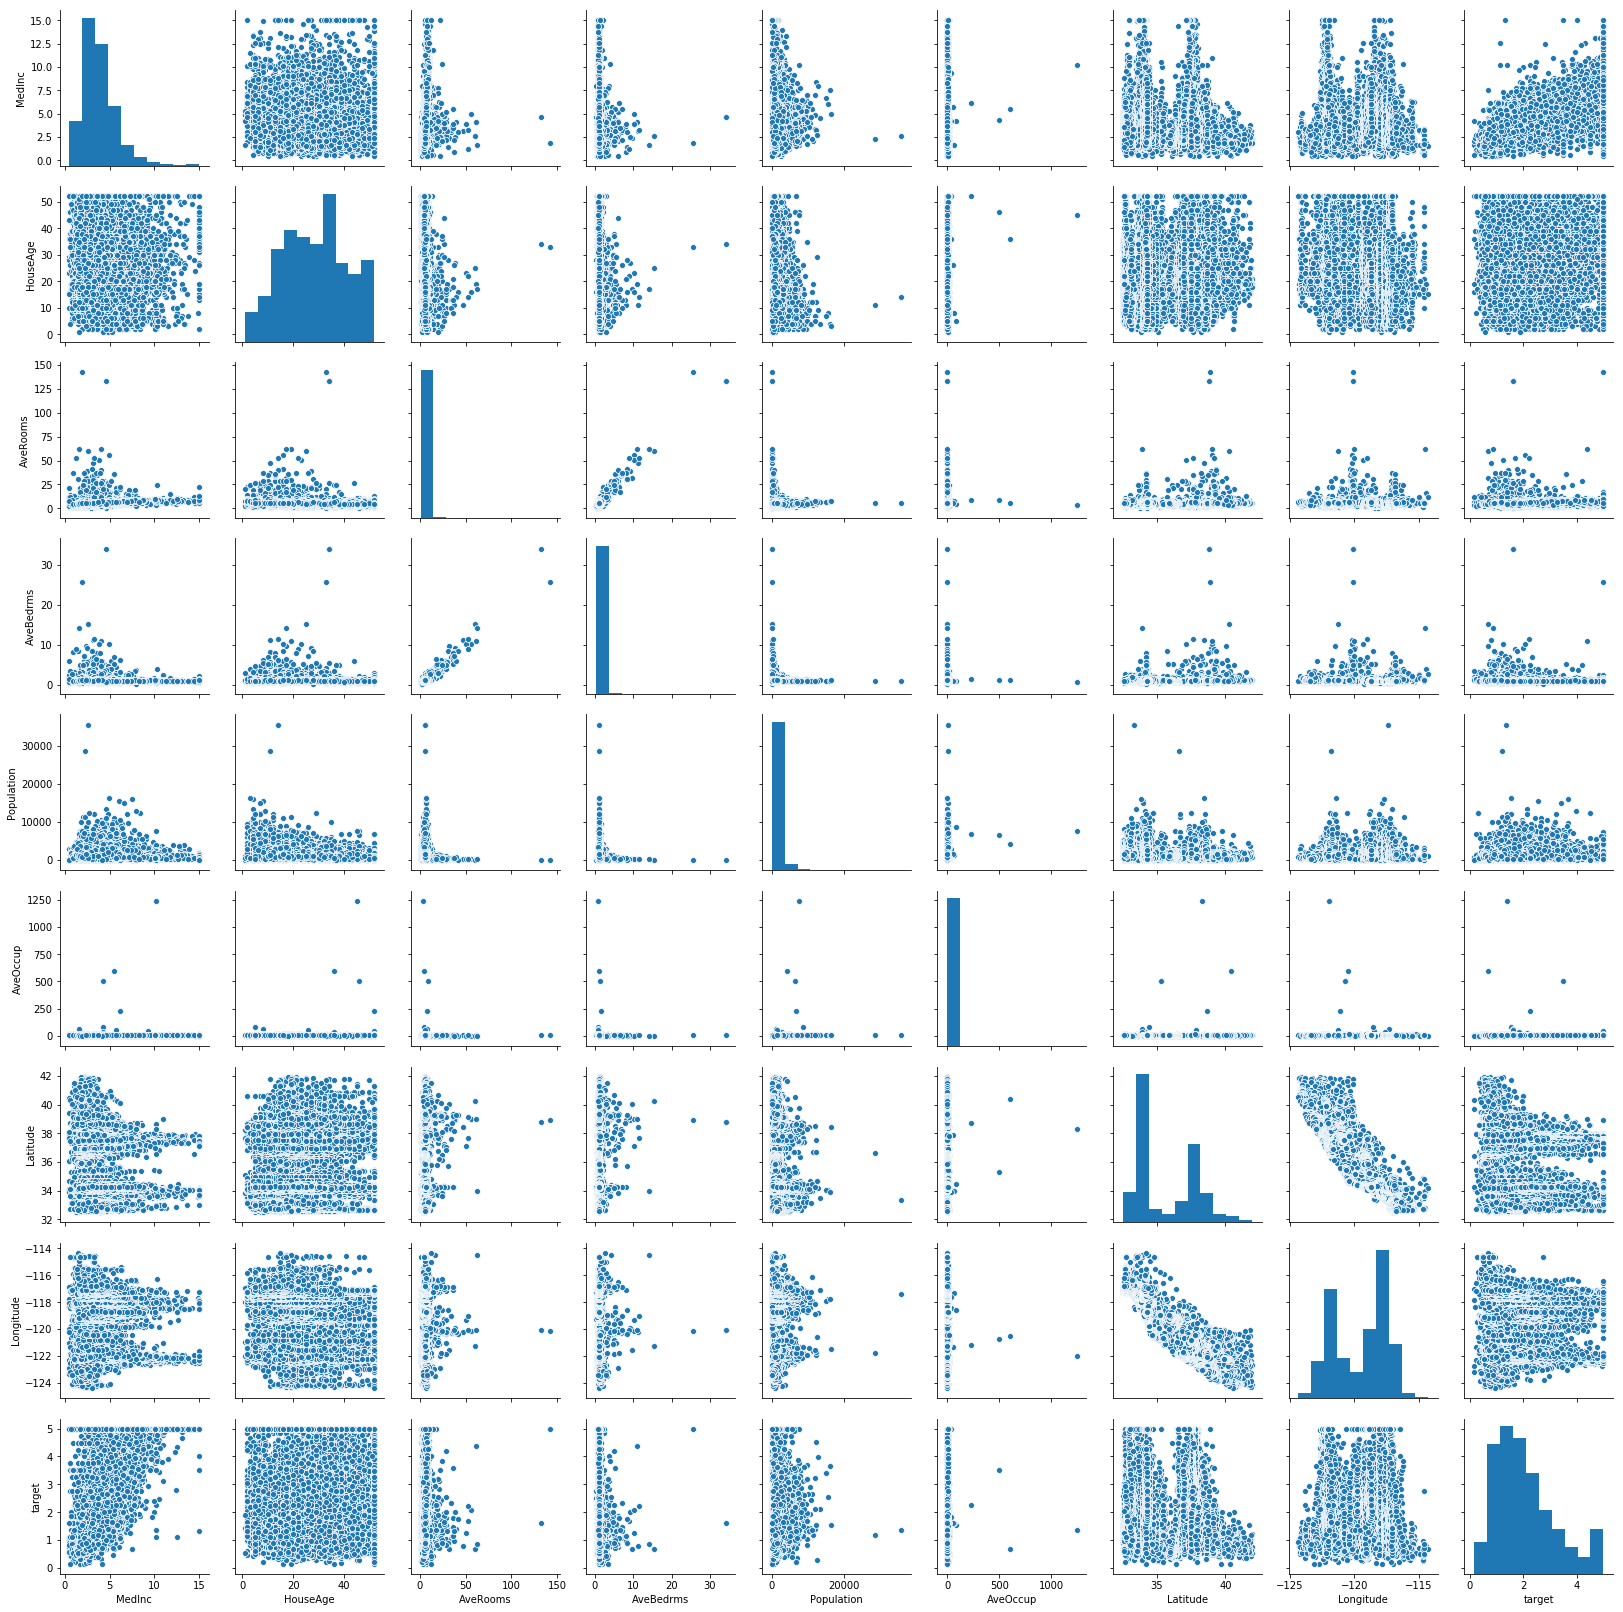

In [54]:
sns.pairplot(train_df);

# 4) Categorical Plots:

Let's first make some categorical variables:

In [55]:
train_df['target_int'] = train_df['target']
train_df.loc[(train_df['target'] < 1), 'target_int'] = 0
train_df.loc[(train_df['target'] >= 1) & (train_df['target'] < 2), 'target_int'] = 1
train_df.loc[(train_df['target'] >= 2) & (train_df['target'] < 3), 'target_int'] = 2
train_df.loc[(train_df['target'] >=3) & (train_df['target'] < 4), 'target_int'] = 3
train_df.loc[(train_df['target'] >= 4), 'target_int'] = 4

In [56]:
train_df['medInc_int'] = train_df['MedInc']
# From 0th percentile to 25th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] < 2.56), 'medInc_int'] = train_df.loc[(train_df['MedInc'] < 2.56), 'MedInc'].mean()
# From 25th percentile to 50th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 2.56) & (train_df['MedInc'] < 3.53), 'MedInc'].mean()
# From 50th percentile to 75th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 3.53) & (train_df['MedInc'] < 4.74), 'MedInc'].mean()
# From 75th percentile to 80th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 4.74) & (train_df['MedInc'] < 7), 'MedInc'].mean()
# From 80th percentile to 100th percentile of Median Income's Distribution
train_df.loc[(train_df['MedInc'] >= 7), 'medInc_int'] = train_df.loc[(train_df['MedInc'] >= 7), 'MedInc'].mean()

### a) Bar plot:

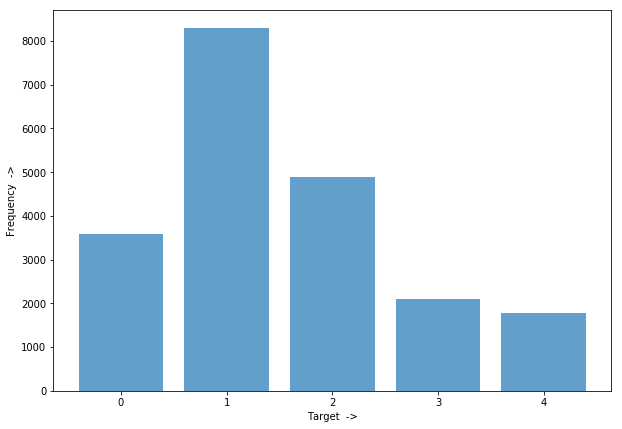

In [57]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

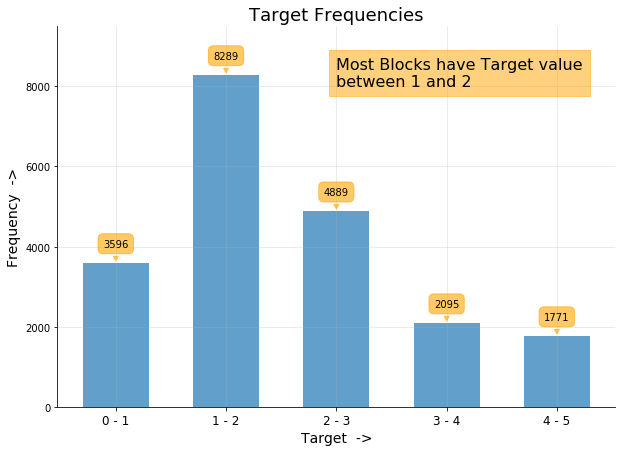

In [58]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)

plt.grid(True, alpha=0.3)
plt.xlabel("Target  ->", fontsize=14)
plt.ylabel("Frequency  ->", fontsize=14)
plt.title("Target Frequencies", fontsize=18)

# Remove top and left spines:
ax = plt.gca() # Get current axis (gca)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
plt.annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
plt.ylim([0, 9500])
plt.text(2, 8000, "Most Blocks have Target value\nbetween 1 and 2", fontsize=16,
           bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.5, 'pad': 7});

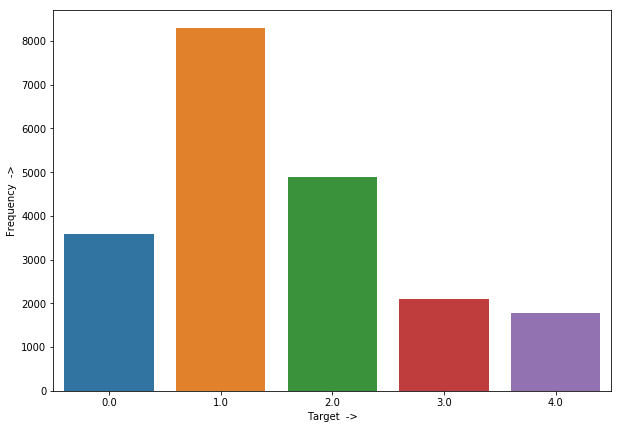

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.barplot(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index())

plt.xlabel("Target  ->")
plt.ylabel("Frequency  ->");

In [60]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.barplot("target_int", "medInc_int", data=train_df)

plt.title("Medium Income Avg vs Target Values", fontsize=16)
plt.xlabel("Target  ->", fontsize=14)
plt.ylabel("Medium Income Mean ->", fontsize=14);

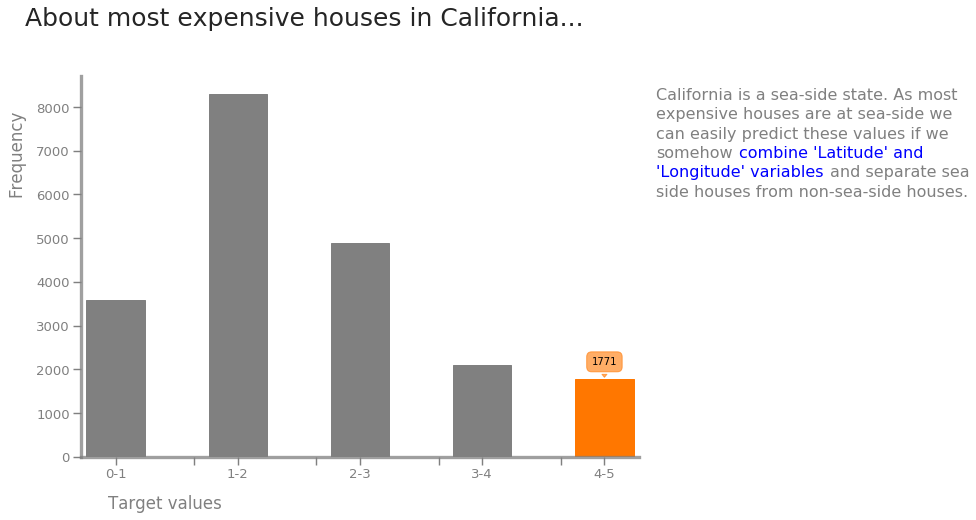

In [61]:
x, y = np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index()
swm = SWMat(plt)
swm.bar(x, y, highlight={"cat": [-1]}, highlight_type={"data_type": "incrementalDown"},
        cat_labels=["0-1", "1-2", "2-3", "3-4", "4-5"], highlight_color={"cat_color": "#FF7700"}, annotate=True)
swm.axis(labels=["Target values", "Frequency"])
swm.title("About most expensive houses in California...")
swm.text("California is a sea-side state. As most\nexpensive houses are at sea-side we\ncan easily predict these values if we\nsomehow <prop color='blue'>combine 'Latitude' and\n'Longitude' variables </prop>and separate sea\nside houses from non-sea-side houses.",
        btw_text_dist=.1);

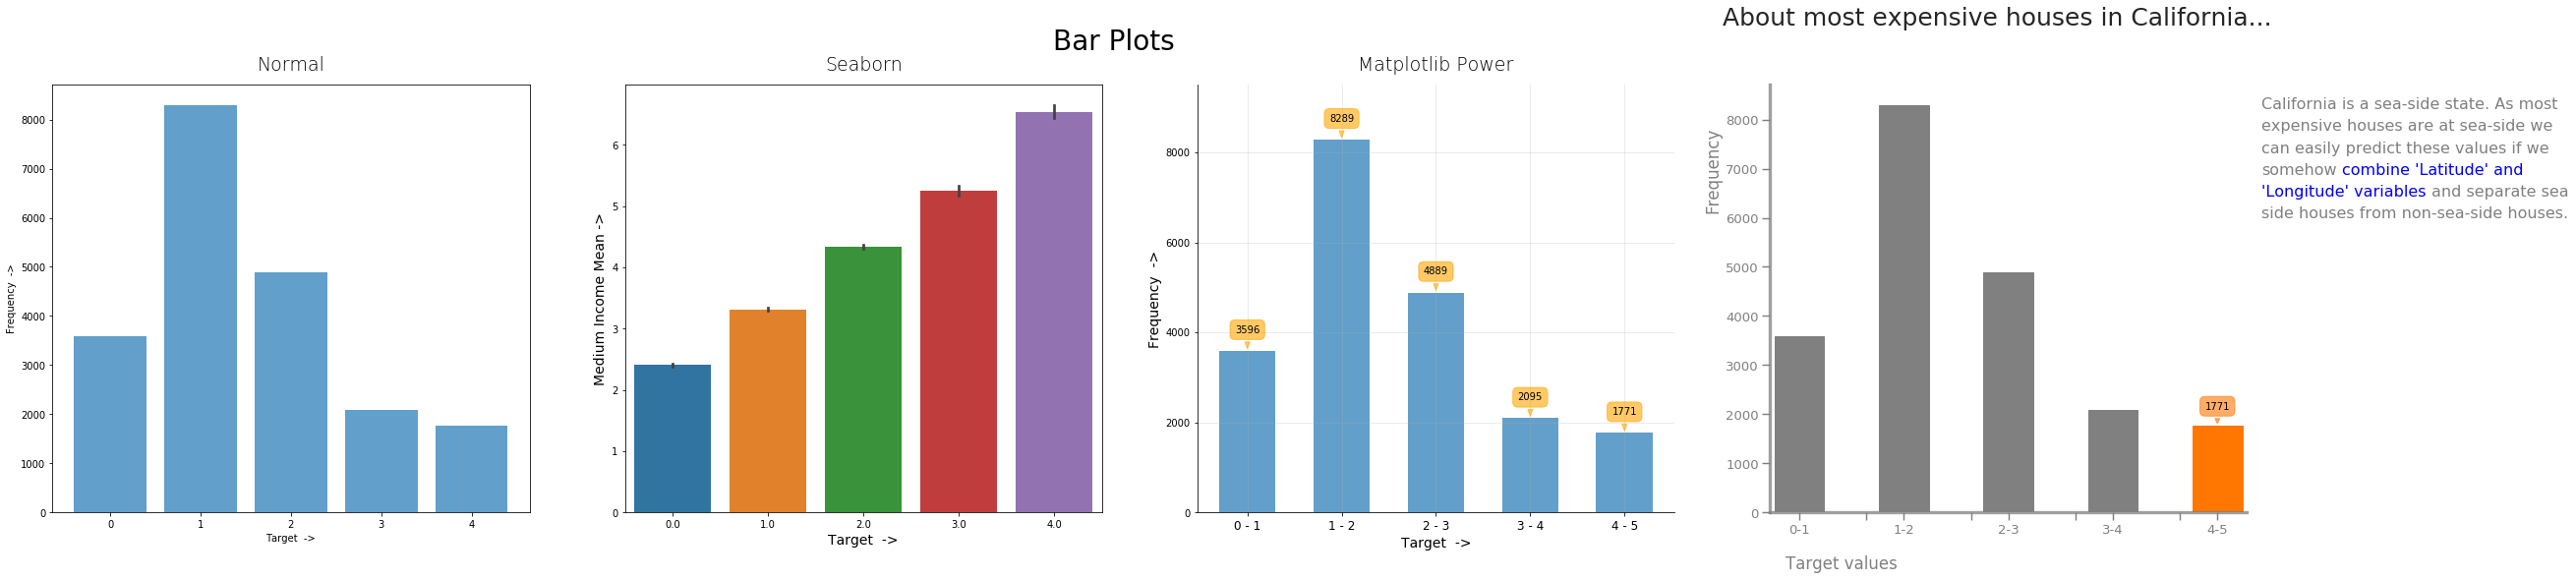

In [62]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Bar Plots", fontsize=28)

axs[0].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("Target  ->")
axs[0].set_ylabel("Frequency  ->")

sns.barplot("target_int", "medInc_int", data=train_df, ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[1].set_xlabel("Target  ->", fontsize=14)
axs[1].set_ylabel("Medium Income Mean ->", fontsize=14)

axs[2].bar(np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index(), alpha=0.7, width=0.6)
axs[2].grid(True, alpha=0.3)
axs[2].set_xlabel("Target  ->", fontsize=14)
axs[2].set_ylabel("Frequency  ->", fontsize=14)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
# Remove top and left spines:
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
# Adding annotations:
counts = train_df['target_int'].value_counts().sort_index()
axs[2].annotate(str(counts[0]), xy=(0, counts[0]), xytext=(0, counts[0]+400), ha = 'center', # horizontalalignment = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[1]), xy=(1, counts[1]), xytext=(1, counts[1]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[2]), xy=(2, counts[2]), xytext=(2, counts[2]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[3]), xy=(3, counts[3]), xytext=(3, counts[3]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].annotate(str(counts[4]), xy=(4, counts[4]), xytext=(4, counts[4]+400), ha = 'center',
         bbox={'boxstyle': 'round', 'pad': 0.5, 'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.6},
         arrowprops={'arrowstyle':"wedge,tail_width=0.5", 'alpha':0.6, 'color': 'orange'})
axs[2].set_xticks([0, 1, 2, 3, 4])
axs[2].set_xticklabels(["0 - 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5"], fontsize=12)
axs[2].set_ylim([0, 9500])

x, y = np.sort(train_df['target_int'].unique()), train_df['target_int'].value_counts().sort_index()
swm = SWMat(plt, ax=axs[3])
swm.bar(x, y, highlight={"cat": [-1]}, highlight_type={"data_type": "incrementalDown"},
        cat_labels=["0-1", "1-2", "2-3", "3-4", "4-5"], highlight_color={"cat_color": "#FF7700"}, annotate=True)
swm.axis(labels=["Target values", "Frequency"])
swm.title("About most expensive houses in California...")
swm.text("California is a sea-side state. As most\nexpensive houses are at sea-side we\ncan easily predict these values if we\nsomehow <prop color='blue'>combine 'Latitude' and\n'Longitude' variables </prop>and separate sea\nside houses from non-sea-side houses.",
        btw_text_dist=.1);

### b) Box Plot:

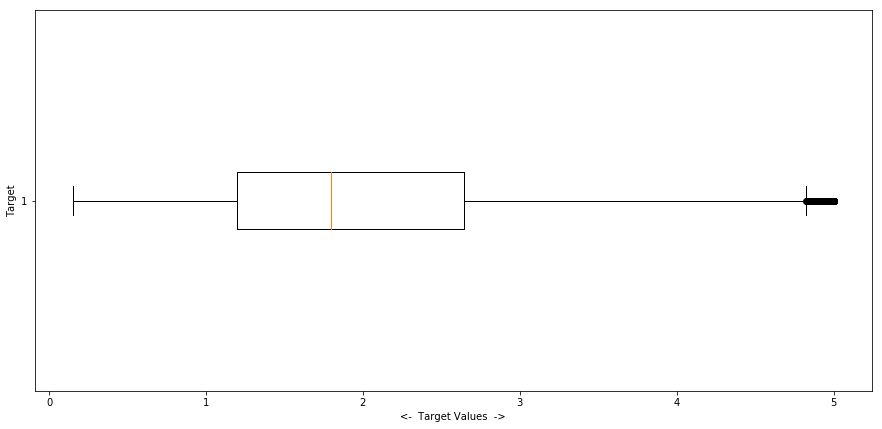

In [63]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

plt.boxplot(train_df['target'], vert=False)

plt.xlabel("<-  Target Values  ->")
plt.ylabel("Target");

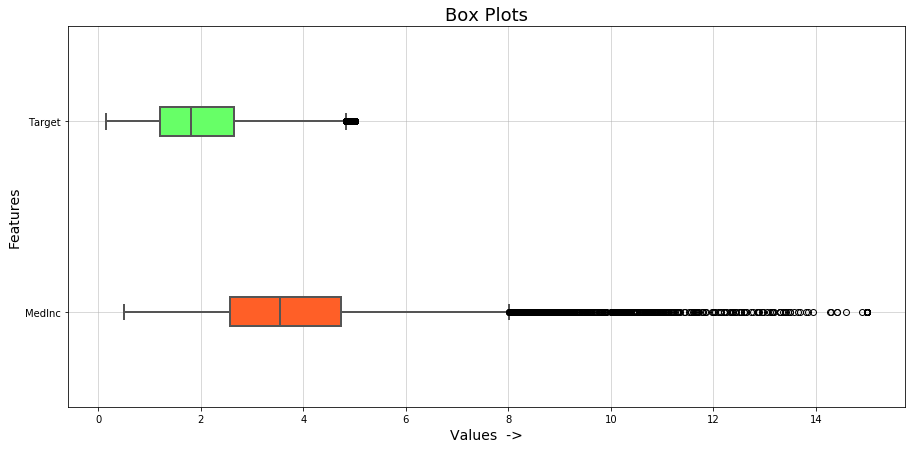

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True) # patch_artist for coloring box plot

plt.grid(True, alpha=0.6)
plt.title("Box Plots", fontsize=18)
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])

# Coloring Box Plots and ...  (https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color)
for el in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    for i in range(len(bp[el])):
        plt.setp(bp[el][i], color='#555555')
        plt.setp(bp[el][i], linewidth=2)

bp['boxes'][0].set(facecolor='#FF5F27')
bp['boxes'][1].set(facecolor="#67FF67");

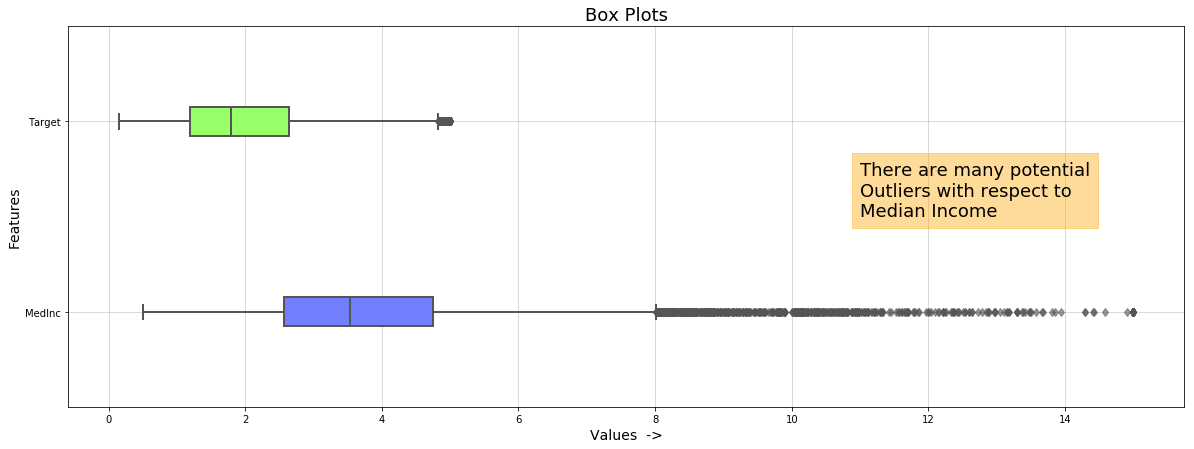

In [65]:
from matplotlib.pyplot import figure
figure(figsize=(20, 7))

bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn

plt.grid(True, alpha=0.6)
plt.title("Box Plots", fontsize=18)
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])

bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67")

# Adding Text:
plt.text(11, 1.5, "There are many potential\nOutliers with respect to\nMedian Income", fontsize=18,
        bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.4, 'pad': 8});

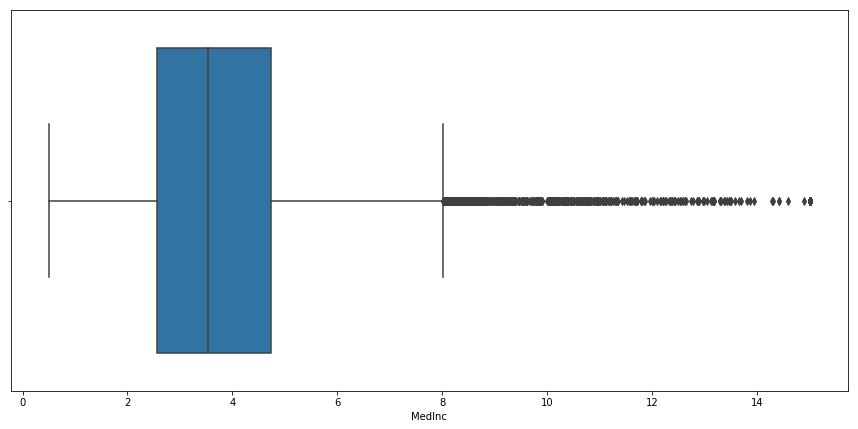

In [66]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

sns.boxplot(train_df['MedInc']); # We can only plot one box like this...

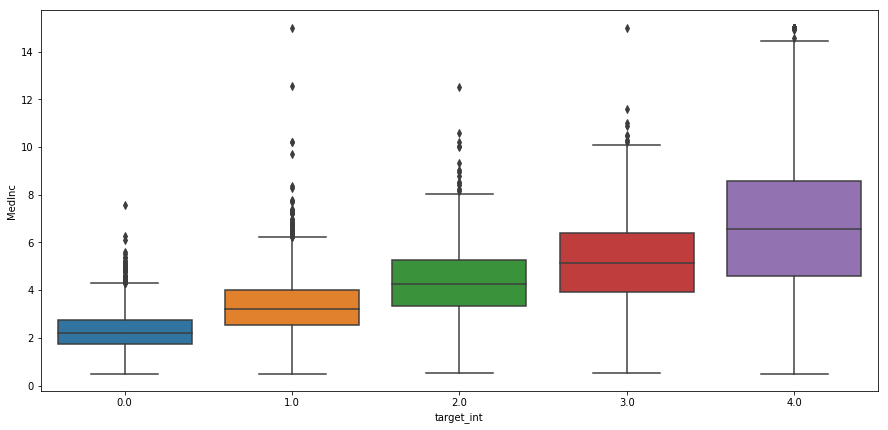

In [67]:
# But we can do something like this with seaborn:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

sns.boxplot(train_df['target_int'], train_df['MedInc']);

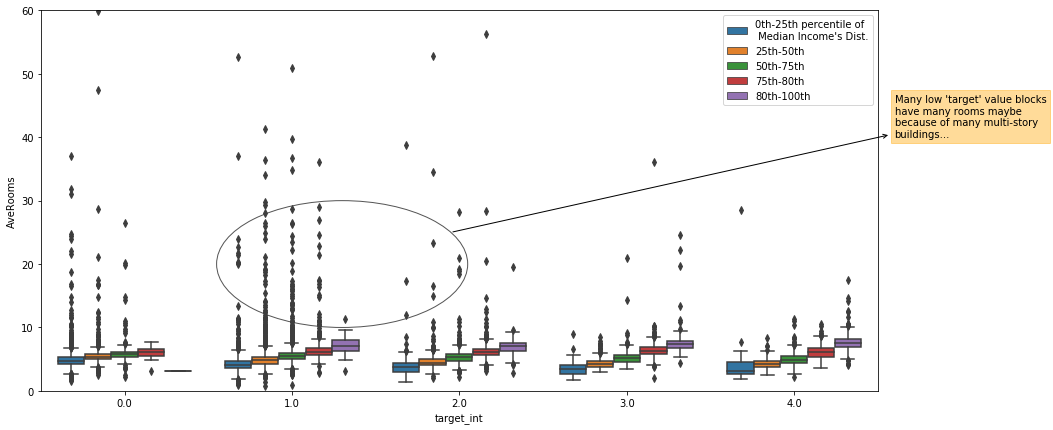

In [68]:
# Or ...
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

bp = sns.boxplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])
plt.ylim([0, 60])

# Changing Legend (with patches):
ps = bp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

### Adding Info: (https://matplotlib.org/examples/shapes_and_collections/artist_reference.html)
## Adding Circle:
import matplotlib.patches as mpatches

eps = mpatches.Ellipse(xy=(1.3, 20), width=1.5, height=20, edgecolor="#555555", fill=False)
ax = plt.gca() # get current axes (gca)
ax.add_patch(eps)
## Adding annotations:
plt.annotate("Many low 'target' value blocks\nhave many rooms maybe\nbecause of many multi-story\nbuildings...",
            xy=(1.95, 25), xytext=(4.6, 40),
            arrowprops={'arrowstyle':'<-', 'color':'k'},
            bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha':0.4, 'pad': 4});

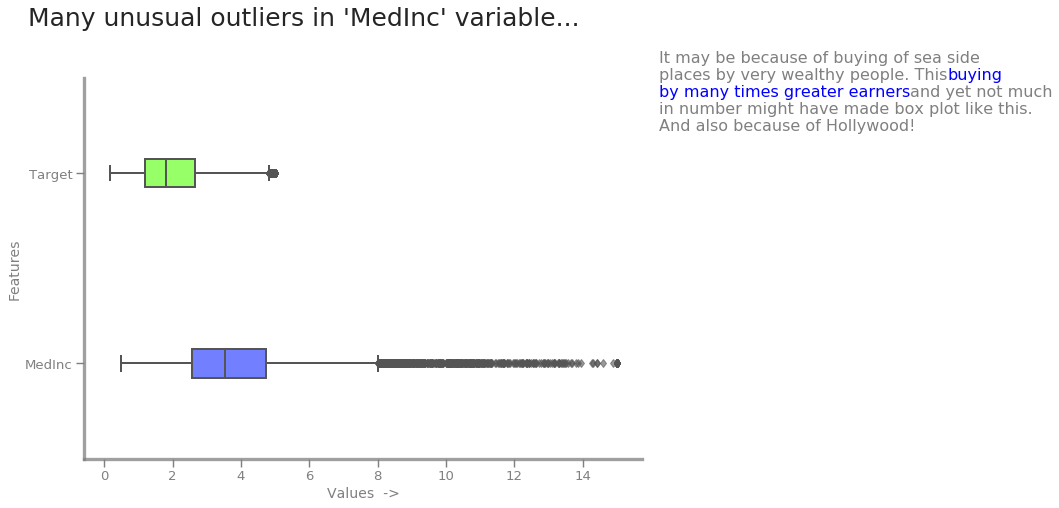

In [69]:
swm = SWMat(plt)
bp = plt.boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                 # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, 
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn
plt.xlabel("Values  ->", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.yticks(ticks=[1, 2], labels=['MedInc', 'Target'])
bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67");

swm.title("Many unusual outliers in 'MedInc' variable...")
swm.text(("It may be because of buying of sea side\n"
          "places by very wealthy people. This <prop color='blue'>buying\n"
          "by many times greater earners</prop> and yet not much\n"
          "in number might have made box plot like this.\n"
          "And also because of Hollywood!"), btw_line_dist=.15, btw_text_dist=.01);

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Box Plots", fontsize=28)

axs[0].boxplot(train_df['target'], vert=False)
axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].set_xlabel("<-  Target Values  ->")
axs[0].set_ylabel("Target")

bp = sns.boxplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'], ax=axs[1])
axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[1].set_ylim([0, 60])
# Changing Legend (with patches):
ps = bp.get_legend_handles_labels()[0] # Patches
axs[1].legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

bp = axs[2].boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True) # patch_artist for coloring box plot
axs[2].grid(True, alpha=0.6)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Values  ->", fontsize=14)
axs[2].set_ylabel("Features", fontsize=14)
axs[2].set_yticks([1, 2])
axs[2].set_yticklabels(['MedInc', 'Target'])
# Coloring Box Plots and ...  (https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color)
for el in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    for i in range(len(bp[el])):
        bp[el][i].set_color('#555555')
        bp[el][i].set_linewidth(2)
bp['boxes'][0].set(facecolor='#FF5F27')
bp['boxes'][1].set(facecolor="#67FF67")
# Adding Text:
axs[2].text(9, 1.5, "There are many potential\nOutliers with respect to\nMedian Income", fontsize=14,
        bbox={'facecolor': 'orange', 'edgecolor': 'orange', 'alpha': 0.4, 'pad': 8});

swm = SWMat(plt, ax=axs[3])
bp = axs[3].boxplot([train_df['MedInc'], train_df['target']], vert=False, patch_artist=True,
                 # (https://stackoverflow.com/questions/32480988/matplotlib-fliers-in-boxplot-object-not-setting-correctly)
                flierprops={'alpha':0.6, 'markersize': 6, 'markeredgecolor': '#555555','marker': 'd',
                           'markerfacecolor': "#555555"}, 
                capprops={'color': '#555555', 'linewidth': 2},
                boxprops={'color': '#555555', 'linewidth': 2},
                whiskerprops={'color': '#555555', 'linewidth': 2},
                medianprops={'color': '#555555', 'linewidth': 2},
                meanprops={'color': '#555555', 'linewidth': 2}) # outlier are computed but not drawn
axs[3].set_xlabel("Values  ->", fontsize=14)
axs[3].set_ylabel("Features", fontsize=14)
axs[3].set_yticks(ticks=[1, 2])
axs[3].set_yticklabels(['MedInc', 'Target'])
bp['boxes'][0].set(facecolor='#727FFF')
bp['boxes'][1].set(facecolor="#97FF67");

swm.title("Many unusual outliers in 'MedInc' variable...")
swm.text(("It may be because of buying of sea side\n"
          "places by very wealthy people. This <prop color='blue'>buying\n"
          "by many times greater earners</prop> and yet not much\n"
          "in number might have made box plot like this.\n"
          "And also because of Hollywood!"), btw_line_dist=.15, btw_text_dist=.01);

Here you can say **seaborn** has taken an edge because of simplisity of making multicategorical box plots.

### c) Violin Plot:

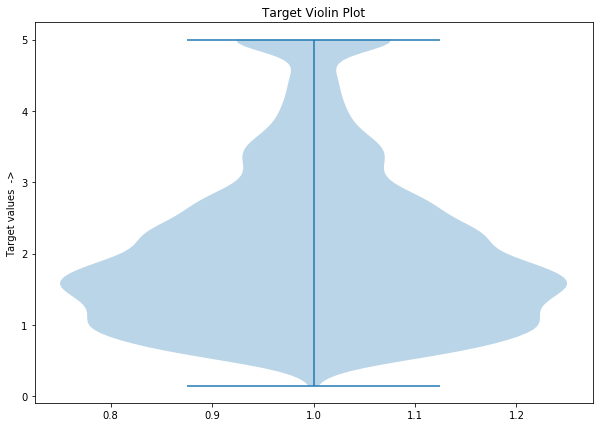

In [71]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

plt.violinplot(train_df['target'])

plt.title("Target Violin Plot")
plt.ylabel("Target values  ->");

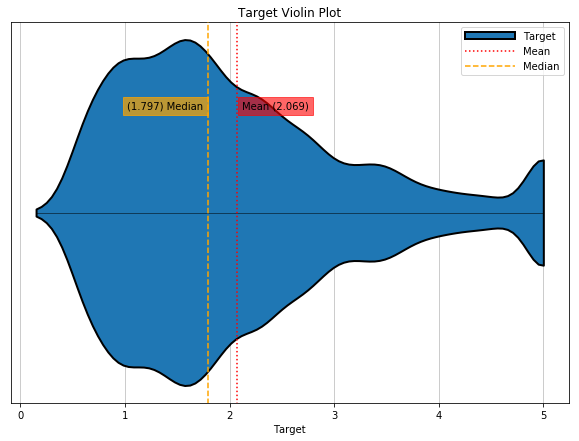

In [72]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

vp = plt.violinplot(train_df['target'], vert=False, showmeans=True, showmedians=True)

# Returns a dictionary with keys : ['bodies', 'cbars', 'cmaxes', 'cmeans', 'cmedians', 'cmins']
vp['bodies'][0].set_edgecolor("k")
vp['bodies'][0].set_linewidth(2)
vp['bodies'][0].set_alpha(1.0)
vp['bodies'][0].set_zorder(10)

vp['cmeans'].set_linestyle(":")
vp['cmeans'].set_color("r")
vp['cmeans'].set_zorder(101)
vp['cmeans'].set_segments(np.array([[[2.06855817, 0.7], [2.06855817, 1.3]]]))

vp['cmedians'].set_linestyle("--")
vp['cmedians'].set_color("orange")
vp['cmedians'].set_zorder(100)
vp['cmedians'].set_segments(np.array([[[1.797, 0.7], [1.797, 1.3]]]))

vp['cbars'].set_zorder(99)
vp['cbars'].set_color("k")
vp['cbars'].set_linewidth(0.5)

vp['cmaxes'].set_visible(False)
vp['cmins'].set_visible(False)

# Legend:
plt.legend(handles=[vp['bodies'][0], vp['cmeans'], vp['cmedians']], labels=["Target", "Mean", "Median"], handlelength=5)

plt.title("Target Violin Plot")
plt.xlabel("Target")
plt.yticks([])
plt.grid(True, alpha=0.8)

# Adding Text
plt.text(1.797-0.773, 1.15, f"({train_df['target'].median()}) Median", fontdict=None,
         bbox={'facecolor':'orange', 'edgecolor': 'orange', 'pad':4, 'alpha': 0.7}, zorder=12)
plt.text(2.06855817+0.05, 1.15, f"Mean ({np.round(train_df['target'].mean(),3)})", fontdict=None,
         bbox={'facecolor':'red', 'edgecolor': 'red', 'pad':4, 'alpha': 0.6}, zorder=11);
#vp['cmeans'].get_segments()

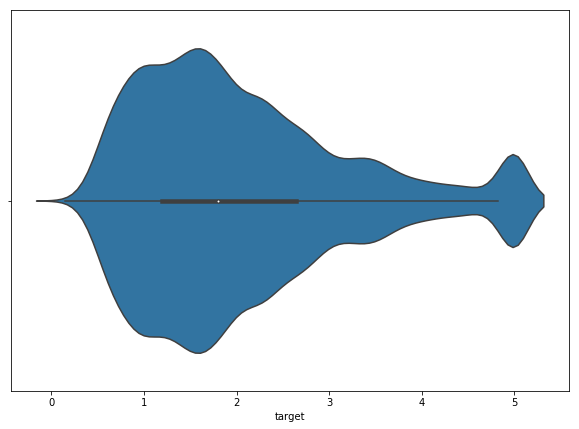

In [73]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))

sns.violinplot(train_df['target']);

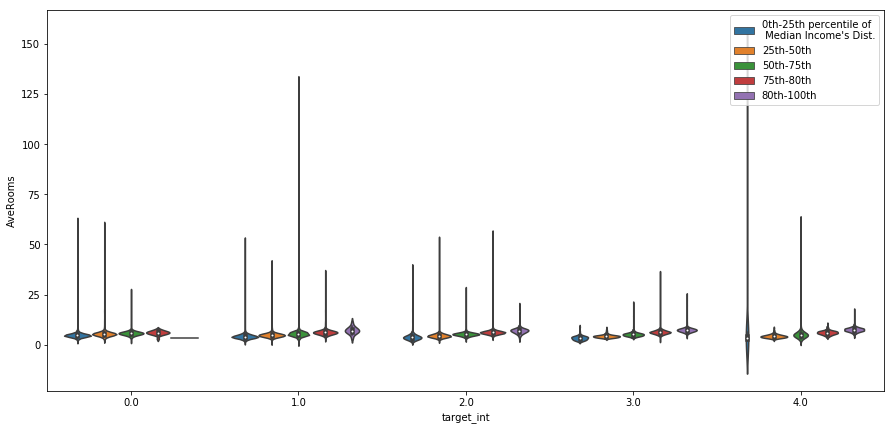

In [74]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7))

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])

# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"]);

In [75]:
plt.figure(figsize=(15, 7))

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'])
# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
plt.legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])
plt.ylim([0, 60])
### Adding Info: (https://matplotlib.org/examples/shapes_and_collections/artist_reference.html)
## Adding Circle:
import matplotlib.patches as mpatches
eps = mpatches.Ellipse(xy=(1.3, 20), width=1.5, height=20, edgecolor="#555555", fill=False)
plt.gca().add_patch(eps)
## Adding annotations:
plt.annotate("Many low 'target' value blocks\nhave many rooms maybe\nbecause of many multi-story\nbuildings...",
            xy=(1.95, 25), xytext=(4.6, 40),
            arrowprops={'arrowstyle':'<-', 'color':'k'},
            bbox={'facecolor': 'orange', 'edgecolor':'orange', 'alpha':0.4, 'pad': 4});

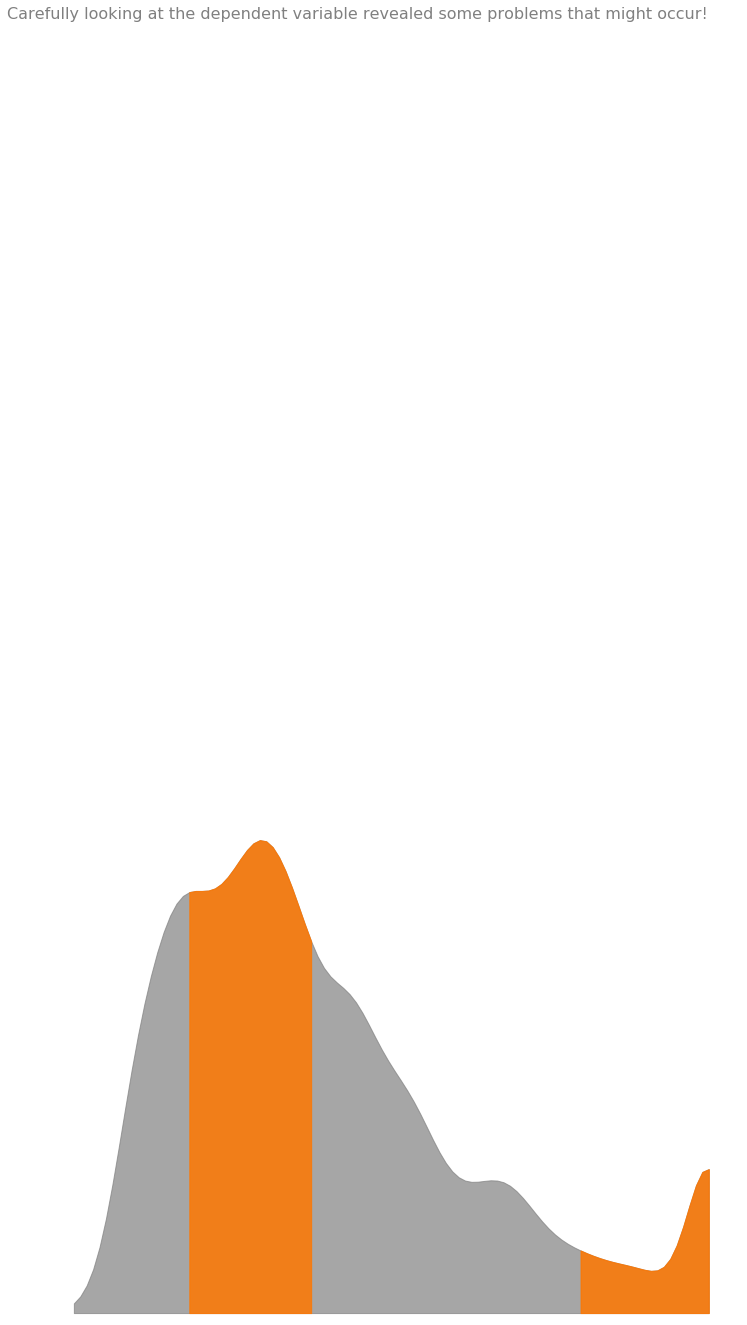

In [76]:
swm = SWMat(plt)
swm.violinplot(train_df['target'], highlight={"0":[(1, 2), (4, 6)]})
swm.text("Carefully looking at the dependent variable revealed some problems that might occur!", position=[-.05, 1.0]);
#swm.text("Target is a bi-modal dependent feature.\nIt can be <prop fontsize='18' color='blue'> hard to predict.<\prop>", btw_line_dist=1e-3, btw_text_dist=.01, position=[1.03, 0]);

Text(2.11855817, 1.15, 'Mean (2.069)')

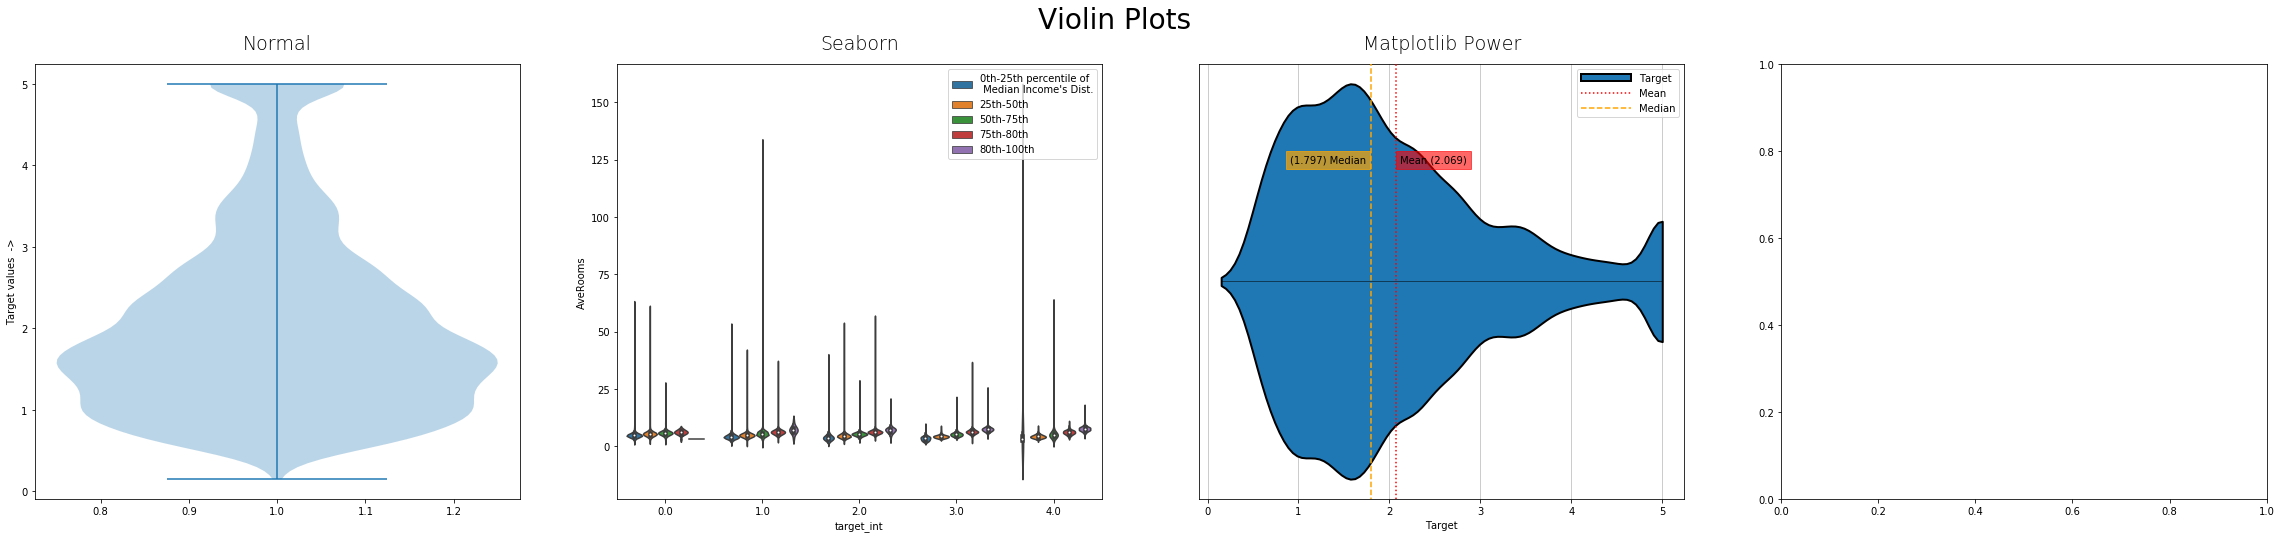

In [77]:
fig, axs = plt.subplots(1, 4, figsize=(40, 8))
fig.suptitle("Violin Plots", fontsize=28)

axs[0].set_title("Normal", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[0].violinplot(train_df['target'])
axs[0].set_ylabel("Target values  ->")

vp = sns.violinplot(train_df['target_int'], train_df['AveRooms'], hue = train_df['medInc_int'], ax=axs[1])
# Changing Legend (with patches):
ps = vp.get_legend_handles_labels()[0] # Patches
axs[1].legend(ps, ["0th-25th percentile of\n Median Income's Dist.", 
          "25th-50th",
          "50th-75th", 
          "75th-80th",
          "80th-100th"])

axs[1].set_title("Seaborn", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
vp = axs[2].violinplot(train_df['target'], vert=False, showmeans=True, showmedians=True)
# Returns a dictionary with keys : ['bodies', 'cbars', 'cmaxes', 'cmeans', 'cmedians', 'cmins']
vp['bodies'][0].set_edgecolor("k")
vp['bodies'][0].set_linewidth(2)
vp['bodies'][0].set_alpha(1.0)
vp['bodies'][0].set_zorder(10)
vp['cmeans'].set_linestyle(":")
vp['cmeans'].set_color("r")
vp['cmeans'].set_zorder(101)
vp['cmeans'].set_segments(np.array([[[2.06855817, 0.7], [2.06855817, 1.3]]]))
vp['cmedians'].set_linestyle("--")
vp['cmedians'].set_color("orange")
vp['cmedians'].set_zorder(100)
vp['cmedians'].set_segments(np.array([[[1.797, 0.7], [1.797, 1.3]]]))
vp['cbars'].set_zorder(99)
vp['cbars'].set_color("k")
vp['cbars'].set_linewidth(0.5)
vp['cmaxes'].set_visible(False)
vp['cmins'].set_visible(False)
# Legend:
axs[2].legend(handles=[vp['bodies'][0], vp['cmeans'], vp['cmedians']], labels=["Target", "Mean", "Median"], handlelength=5)
axs[2].set_title("Matplotlib Power", fontdict={'fontsize': 19, 'fontweight':0.5 }, pad=15)
axs[2].set_xlabel("Target")
axs[2].set_yticks([])
axs[2].grid(True, alpha=0.8)
# Adding Text
axs[2].text(1.797-0.893, 1.15, f"({train_df['target'].median()}) Median", fontdict=None,
         bbox={'facecolor':'orange', 'edgecolor': 'orange', 'pad':4, 'alpha': 0.7}, zorder=12)
axs[2].text(2.06855817+0.05, 1.15, f"Mean ({np.round(train_df['target'].mean(),3)})", fontdict=None,
         bbox={'facecolor':'red', 'edgecolor': 'red', 'pad':4, 'alpha': 0.6}, zorder=11)



# 5) Multiple Plots:

### a) Joint Distribution:

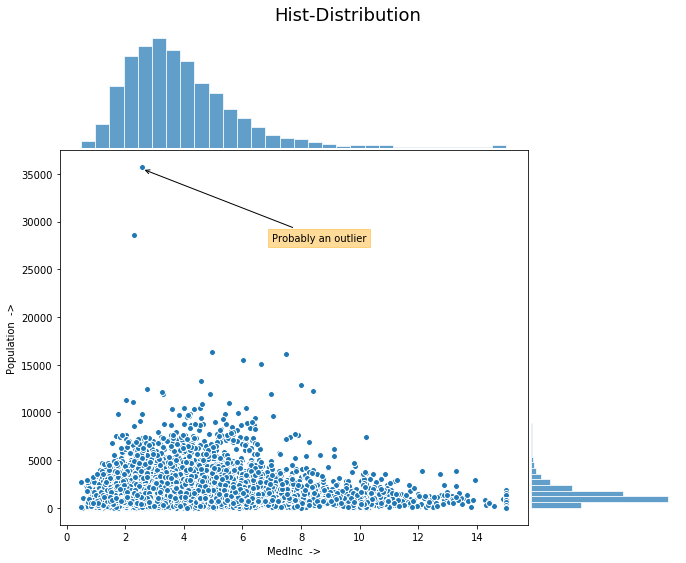

In [78]:
plt.figure(1, figsize=(10, 8))
plt.suptitle("Hist-Distribution", fontsize=18, y=1)

# Now lets make some axes (diff graphs) in this figure
axScatter = plt.axes([0.1, 0.1, 0.65, 0.65]) # [left, bottom, width, height] in percent values
axHistx = plt.axes([0.1, 0.755, 0.65, 0.2])
axHisty = plt.axes([0.755, 0.1, 0.2, 0.65])

axHistx.set_xticks([])
axHistx.set_yticks([])
axHisty.set_xticks([])
axHisty.set_yticks([])
axHistx.set_frame_on(False)
axHisty.set_frame_on(False)
axScatter.set_xlabel("MedInc  ->")
axScatter.set_ylabel("Population  ->")

# Lets plot in these axes:
axScatter.scatter('MedInc', 'Population', data=train_df, edgecolors='w')
axHistx.hist('MedInc', bins=30, data=train_df, ec='w', density=True, alpha=0.7)
axHisty.hist('Population', bins=60, data=train_df, ec='w', density=True, alpha=0.7, orientation='horizontal')
#train_df['MedInc'].plot.kde(ax=axHistx, color='b')
axHistx.set_ylabel("")

# Adding annotations:
axScatter.annotate("Probably an outlier", xy=(2.6, 35500), xytext=(7, 28000),
                   arrowprops={'arrowstyle':'->'}, 
                   bbox={'pad':4, 'facecolor':'orange', 'alpha': 0.4, 'edgecolor':'orange'});

<Figure size 720x576 with 0 Axes>

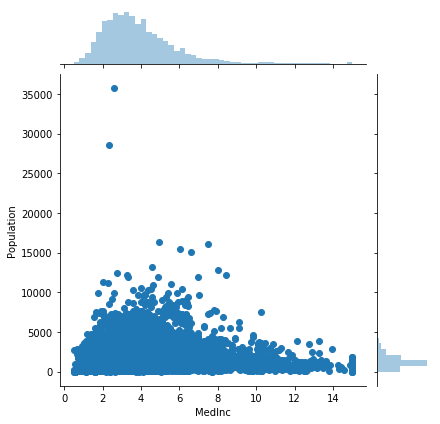

In [79]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

sns.jointplot('MedInc', 'Population', data=train_df);

# 6) Interactive Plots:

In [80]:
%matplotlib notebook

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
%matplotlib notebook

class PointBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()


# Fixing random state for reproducibility
np.random.seed(19680801)

X = np.random.rand(100, 200)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, (ax, ax2) = plt.subplots(2, 1)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

browser = PointBrowser()

fig.canvas.mpl_connect('pick_event', browser.onpick)
fig.canvas.mpl_connect('key_press_event', browser.onpress)

<IPython.core.display.Javascript object>

7

In [82]:
%matplotlib notebook

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

# Others:

In [84]:
%matplotlib inline

## 3D plots:

In [85]:
from mpl_toolkits import mplot3d

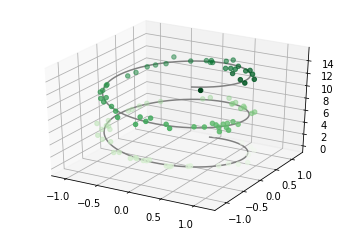

In [86]:
ax = plt.gca(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Text(0.5, 0.92, 'Bar Plot')

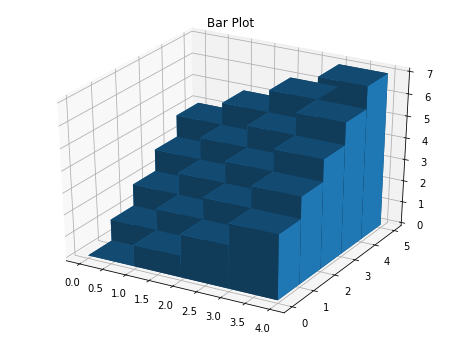

In [87]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# setup the figure and axes
plt.figure(figsize=(8, 6))
ax = plt.gca(projection='3d')

# data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, top, shade=True)
ax.set_title('Bar Plot')

Text(0.5, 0, 'Z')

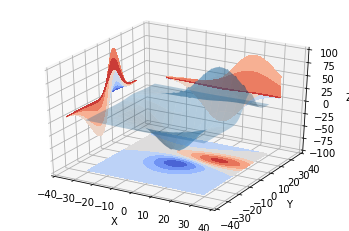

In [88]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Geographical Plots:

In [89]:
#!conda install -c conda-forge basemap

In [90]:
from mpl_toolkits.basemap import Basemap

In [91]:
?Basemap # ['llcrnrlon=None', 'llcrnrlat=None', 'urcrnrlon=None', 'urcrnrlat=None', 'llcrnrx=None', 
         #  'llcrnry=None', 'urcrnrx=None', 'urcrnry=None', 'width=None', 'height=None', "projection='cyl'", 
         #  "resolution='c'", 'area_thresh=None', 'rsphere=6370997.0', 'ellps=None', 'lat_ts=None', 'lat_1=None', 
         #  'lat_2=None', 'lat_0=None', 'lon_0=None', 'lon_1=None', 'lon_2=None', 'o_lon_p=None', 'o_lat_p=None',
         #  'k_0=None', 'no_rot=False', 'suppress_ticks=True', 'satellite_height=35786000', 'boundinglat=None', 
         #  'fix_aspect=True', "anchor='C'", 'celestial=False', 'round=False', 'epsg=None', 'ax=None']

Sets up a basemap with specified map projection.
and creates the coastline data structures in map projection
coordinates.

Calling a Basemap class instance with the arguments lon, lat will
convert lon/lat (in degrees) to x/y map projection coordinates
(in meters). The inverse transformation is done if the optional keyword
``inverse`` is set to True.

The desired projection is set with the projection keyword. Default is ``cyl``.
Supported values for the projection keyword are:

`cyl`:              Cylindrical Equidistant  

`merc`:             Mercator                                

`tmerc`:            Transverse Mercator                     

`omerc`:            Oblique Mercator                        

`mill`:             Miller Cylindrical                      

`gall`:             Gall Stereographic Cylindrical          

`cea`:              Cylindrical Equal Area                  

`lcc`:              Lambert Conformal                       

`laea`:             Lambert Azimuthal Equal Area            

`nplaea`:           North-Polar Lambert Azimuthal           

`splaea`:           South-Polar Lambert Azimuthal           

`eqdc`:             Equidistant Conic                       

`aeqd`:             Azimuthal Equidistant                   

`npaeqd`:           North-Polar Azimuthal Equidistant       

`spaeqd`:           South-Polar Azimuthal Equidistant       

`aea`:              Albers Equal Area                       

`stere`:            Stereographic                           

`npstere`:          North-Polar Stereographic               

`spstere`:          South-Polar Stereographic               

`cass`:             Cassini-Soldner                         

`poly`:             Polyconic                               

`ortho`:            Orthographic                            

`geos`:             Geostationary                           

`nsper`:            Near-Sided Perspective                  

`sinu`:             Sinusoidal                              

`moll`:             Mollweide                               

`hammer`:           Hammer                                  

`robin`:            Robinson                                

`kav7`:             Kavrayskiy VII                          

`eck4`:             Eckert IV                               

`vandg`:            van der Grinten                         

`mbtfpq`:           McBryde-Thomas Flat-Polar Quartic       

`gnom`:             Gnomonic                                

`rotpole`:          Rotated Pole                            

---
---

For most map projections, the map projection region can either be
specified by setting these keywords:

.. tabularcolumns:: |l|L|

`llcrnrlon`:        longitude of lower left hand corner of the desired map
                 domain (degrees).

`llcrnrlat`:        latitude of lower left hand corner of the desired map
                 domain (degrees).

`urcrnrlon`:        longitude of upper right hand corner of the desired map
                 domain (degrees).

`urcrnrlat`:        latitude of upper right hand corner of the desired map
                 domain (degrees).

---
---

or these

.. tabularcolumns:: |l|L|


`width`:            width of desired map domain in projection coordinates
                 (meters).

`height`:           height of desired map domain in projection coordinates
                 (meters).

`lon_0`:            center of desired map domain (in degrees).

`lat_0`:            center of desired map domain (in degrees).

---
---

For ``sinu``, ``moll``, ``hammer``, ``npstere``, ``spstere``, ``nplaea``, ``splaea``,
``npaeqd``, ``spaeqd``, ``robin``, ``eck4``, ``kav7``, or ``mbtfpq``, the values of
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat, width and height are ignored
(because either they are computed internally, or entire globe is
always plotted).

For the cylindrical projections (``cyl``, ``merc``, ``mill``, ``cea``  and ``gall``),
the default is to use
llcrnrlon=-180,llcrnrlat=-90, urcrnrlon=180 and urcrnrlat=90). For all other
projections except ``ortho``, ``geos`` and ``nsper``, either the lat/lon values of the
corners or width and height must be specified by the user.

For ``ortho``, ``geos`` and ``nsper``, the lat/lon values of the corners may be specified,
or the x/y values of the corners (llcrnrx,llcrnry,urcrnrx,urcrnry) in the
coordinate system of the global projection (with x=0,y=0 at the center
of the global projection).  If the corners are not specified,
the entire globe is plotted.

For ``rotpole``, the lat/lon values of the corners on the unrotated sphere
may be provided as llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat, or the lat/lon
values of the corners on the rotated sphere can be given as
llcrnrx,llcrnry,urcrnrx,urcrnry.

Other keyword arguments:

.. tabularcolumns:: |l|L|

`resolution`:       resolution of boundary database to use. Can be ``c``
                 (crude), ``l`` (low), ``i`` (intermediate), ``h``
                 (high), ``f`` (full) or None.
                 If None, no boundary data will be read in (and
                 class methods such as drawcoastlines will raise an
                 if invoked).
                 Resolution drops off by roughly 80% between datasets.
                 Higher res datasets are much slower to draw.
                 Default ``c``. Coastline data is from the GSHHS
                 (http://www.soest.hawaii.edu/wessel/gshhs/gshhs.html).
                 State, country and river datasets from the Generic
                 Mapping Tools (http://gmt.soest.hawaii.edu).

`area_thresh`:      coastline or lake with an area smaller than
                 area_thresh in km^2 will not be plotted.
                 Default 10000,1000,100,10,1 for resolution
                 ``c``, ``l``, ``i``, ``h``, ``f``.

`rsphere`:          radius of the sphere used to define map projection
                 (default 6370997 meters, close to the arithmetic mean
                 radius of the earth). If given as a sequence, the
                 first two elements are interpreted as the radii
                 of the major and minor axes of an ellipsoid.
                 Note: sometimes an ellipsoid is specified by the
                 major axis and an inverse flattening parameter (if).
                 The minor axis (b) can be computed from the major
                 axis (a) and the inverse flattening parameter using
                 the formula if = a/(a-b).

`ellps`:            string describing ellipsoid ('GRS80' or 'WGS84',
                 for example). If both rsphere and ellps are given,
                 rsphere is ignored. Default None. See pyproj.pj_ellps
                 for allowed values.

`suppress_ticks`:   suppress automatic drawing of axis ticks and labels
                 in map projection coordinates.  Default True,
                 so parallels and meridians can be labelled instead.
                 If parallel or meridian labelling is requested
                 (using drawparallels and drawmeridians methods),
                 automatic tick labelling will be supressed even if
                 suppress_ticks=False.  suppress_ticks=False
                 is useful if you want to use your own custom tick
                 formatter, or  if you want to let matplotlib label
                 the axes in meters using map projection
                 coordinates.

`fix_aspect`:       fix aspect ratio of plot to match aspect ratio
                 of map projection region (default True).

`anchor`:           determines how map is placed in axes rectangle
                 (passed to axes.set_aspect). Default is ``C``,
                 which means map is centered.
                 Allowed values are
                 ``C``, ``SW``, ``S``, ``SE``, ``E``, ``NE``,
                 ``N``, ``NW``, and ``W``.

`celestial`:        use astronomical conventions for longitude (i.e.
                 negative longitudes to the east of 0). Default False.
                 Implies resolution=None.

`ax`:               set default axes instance
                 (default None - matplotlib.pyplot.gca() may be used
                 to get the current axes instance).
                 If you do not want matplotlib.pyplot to be imported,
                 you can either set this to a pre-defined axes
                 instance, or use the ``ax`` keyword in each Basemap
                 method call that does drawing. In the first case,
                 all Basemap method calls will draw to the same axes
                 instance.  In the second case, you can draw to
                 different axes with the same Basemap instance.
                 You can also use the ``ax`` keyword in individual
                 method calls to selectively override the default
                 axes instance.

---
---

The following keywords are map projection parameters which all default to
None.  Not all parameters are used by all projections, some are ignored.
The module variable ``projection_params`` is a dictionary which
lists which parameters apply to which projections.

.. tabularcolumns:: |l|L|

`lat_ts`:           latitude of true scale. Optional for stereographic,
                 cylindrical equal area and mercator projections.
                 default is lat_0 for stereographic projection.
                 default is 0 for mercator and cylindrical equal area
                 projections.

`lat_1`:            first standard parallel for lambert conformal,
                 albers equal area and equidistant conic.
                 Latitude of one of the two points on the projection
                 centerline for oblique mercator. If lat_1 is not given, but
                 lat_0 is, lat_1 is set to lat_0 for lambert
                 conformal, albers equal area and equidistant conic.

`lat_2`:            second standard parallel for lambert conformal,
                 albers equal area and equidistant conic.
                 Latitude of one of the two points on the projection
                 centerline for oblique mercator. If lat_2 is not
                 given it is set to lat_1 for lambert conformal,
                 albers equal area and equidistant conic.

`lon_1`:            Longitude of one of the two points on the projection
                 centerline for oblique mercator.

`lon_2`:            Longitude of one of the two points on the projection
                 centerline for oblique mercator.

`k_0`:              Scale factor at natural origin (used
                 by 'tmerc', 'omerc', 'stere' and 'lcc').

`no_rot`:           only used by oblique mercator.
                 If set to True, the map projection coordinates will
                 not be rotated to true North.  Default is False
                 (projection coordinates are automatically rotated).

`lat_0`:            central latitude (y-axis origin) - used by all
                 projections.

`lon_0`:            central meridian (x-axis origin) - used by all
                 projections.

`o_lat_p`:          latitude of rotated pole (only used by 'rotpole')

`o_lon_p`:          longitude of rotated pole (only used by 'rotpole')

`boundinglat`:      bounding latitude for pole-centered projections
                 (npstere,spstere,nplaea,splaea,npaeqd,spaeqd).
                 These projections are square regions centered
                 on the north or south pole.
                 The longitude lon_0 is at 6-o'clock, and the
                 latitude circle boundinglat is tangent to the edge
                 of the map at lon_0.

`round`:            cut off pole-centered projection at boundinglat
                 (so plot is a circle instead of a square). Only
                 relevant for npstere,spstere,nplaea,splaea,npaeqd
                 or spaeqd projections. Default False.

`satellite_height`: height of satellite (in m) above equator -
                 only relevant for geostationary
                 and near-sided perspective (``geos`` or ``nsper``)
                 projections. Default 35,786 km.

---
---

Useful instance variables:

.. tabularcolumns:: |l|L|

`projection`:       map projection. Print the module variable
                 ``supported_projections`` to see a list of allowed
                 values.

`epsg`:             EPSG code defining projection (see
                 http://spatialreference.org for a list of
                 EPSG codes and their definitions).

`aspect`:           map aspect ratio
                 (size of y dimension / size of x dimension).

`llcrnrlon`:        longitude of lower left hand corner of the
                 selected map domain.

`llcrnrlat`:        latitude of lower left hand corner of the
                 selected map domain.

`urcrnrlon`:        longitude of upper right hand corner of the
                 selected map domain.

`urcrnrlat`:        latitude of upper right hand corner of the
                 selected map domain.

`llcrnrx`:          x value of lower left hand corner of the
                 selected map domain in map projection coordinates.

`llcrnry`:          y value of lower left hand corner of the
                 selected map domain in map projection coordinates.

`urcrnrx`:          x value of upper right hand corner of the
                 selected map domain in map projection coordinates.

`urcrnry`:          y value of upper right hand corner of the
                 selected map domain in map projection coordinates.

`rmajor`:           equatorial radius of ellipsoid used (in meters).

`rminor`:           polar radius of ellipsoid used (in meters).

`resolution`:       resolution of boundary dataset being used (``c``
                 for crude, ``l`` for low, etc.).
                 If None, no boundary dataset is associated with the
                 Basemap instance.

`proj4string`:      the string describing the map projection that is
                 used by PROJ.4.

---
---

**Converting from Geographic (lon/lat) to Map Projection (x/y) Coordinates**

Calling a Basemap class instance with the arguments lon, lat will
convert lon/lat (in degrees) to x/y map projection
coordinates (in meters).  If optional keyword ``inverse`` is
True (default is False), the inverse transformation from x/y
to lon/lat is performed.

For cylindrical equidistant projection (``cyl``), this
does nothing (i.e. x,y == lon,lat).

For non-cylindrical projections, the inverse transformation
always returns longitudes between -180 and 180 degrees. For
cylindrical projections (self.projection == ``cyl``, ``mill``,
``cea``, ``gall`` or ``merc``)
the inverse transformation will return longitudes between
self.llcrnrlon and self.llcrnrlat.

Input arguments lon, lat can be either scalar floats, sequences
or numpy arrays.

##### That is just too much!! But its not that hard:

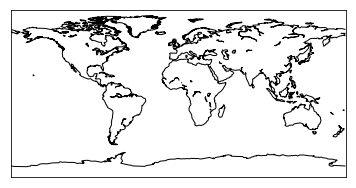

In [92]:
m = Basemap()

m.drawcoastlines()

Hmm... cool. I think we are getting somewhere...

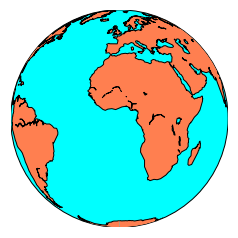

In [93]:
m = Basemap(projection='ortho', lat_0=0, lon_0=0)

#Fill the globe with a blue color 
m.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
m.fillcontinents(color='coral', lake_color='aqua')

m.drawcoastlines()

Now lets plot a point on this globe:

TypeError: 'int' object is not iterable

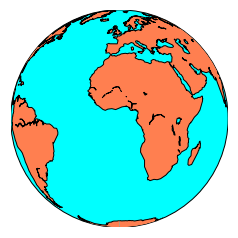

In [94]:
m = Basemap(projection='ortho', lat_0=0, lon_0=0)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()

x, y = map(0, 0) # Converts lat, lon to plot's x, y coordinates.

m.plot(x, y, marker='D',color='m')

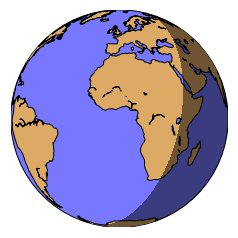

In [95]:
from datetime import datetime

m = Basemap(projection='ortho', lon_0=0, lat_0=0, resolution='c')

m.drawmapboundary(fill_color="#7777ff")
m.fillcontinents(color="#ddaa66",lake_color="#7777ff")

m.drawcoastlines()

m.nightshade(datetime.now(), delta=0.2)

##### Easy, isn't it?
You can actually use most of matplotlib's original functions here like `text`, `plot`, `annotate`, `bar`, `contour`, `hexbin` and even 3D plots on these projections!!

And its also has some functions related to geographic plots too like `streamplot`, `quiver` etc.

And install this too: `conda install -c conda-forge basemap-data-hires` for 'intermediate', 'high' or 'full' resolution images. Otherwise you have 'crude' and 'low' only.

In [96]:
m = Basemap(llcrnrlon=-125, llcrnrlat=27, urcrnrlon=-113, urcrnrlat=43,
             resolution='i', projection='tmerc', lat_0 = 35, lon_0 =-119) # llcrnr: lower left corner; urcrnr: upper right corner

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#cc9955',lake_color='aqua')
m.drawcoastlines()

m.drawmapscale(-119, 28.5, -114, 29.5, 500, fontsize = 14);

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install basemap-data-hires`.

You can also download map data from APIs in Basemap

In [97]:
m = Basemap(llcrnrlon=3.75 llcrnrlat=39.75, urcrnrlon=4.35, urcrnrlat=40.15, epsg=5520) # EPSG code defining projection (see http://spatialreference.org for a list of EPSG codes and their definitions).
#http://server.arcgisonline.com/arcgis/rest/services

m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

SyntaxError: invalid syntax (<ipython-input-97-3da98027b359>, line 1)

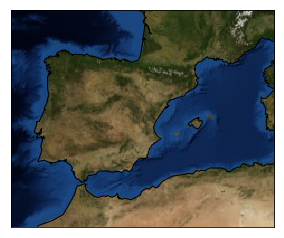

In [98]:
m = Basemap(llcrnrlon=-10.5, llcrnrlat=33, urcrnrlon=10., urcrnrlat=46.,
             resolution='l', projection='cass', lat_0 = 39.5, lon_0 = 0.)

m.bluemarble()

m.drawcoastlines()

In [99]:
train_df.head()

MedInc  HouseAge  AveRooms     ...      target  target_int  medInc_int
0  8.3252      41.0  6.984127     ...       4.526         4.0    8.989464
1  8.3014      21.0  6.238137     ...       3.585         3.0    8.989464
2  7.2574      52.0  8.288136     ...       3.521         3.0    8.989464
3  5.6431      52.0  5.817352     ...       3.413         3.0    5.615409
4  3.8462      52.0  6.281853     ...       3.422         3.0    4.079622

[5 rows x 11 columns]

In [100]:
colors = []
for i in range(train_df.shape[0]):
    if train_df.iloc[i, -1] > 4.0: colors.append("r")
    elif train_df.iloc[i, -1] > 3.0: colors.append("m")
    elif train_df.iloc[i, -1] > 2.0: colors.append("y")
    else: colors.append("gray")

In [101]:
from mpl_toolkits.mplot3d import Axes3D

m = Basemap(llcrnrlon=-125, llcrnrlat=27, urcrnrlon=-113, urcrnrlat=43, resolution='i')

fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig)

ax.set_axis_off()
ax.azim = 270 # Azimuth angle
ax.dist = 6   # Distance of eye-viewing point fro object point

ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
ax.add_collection3d(m.drawcountries(linewidth=0.35))
ax.add_collection3d(m.drawstates(linewidth=0.30))

x, y = train_df['Longitude'].values, train_df['Latitude'].values
x, y = m(x, y)
ax.bar3d(x, y, np.zeros(len(x)), 30, 30, np.ones(len(x))/10, color=colors, alpha=0.8)
#ax.set_zlim([0, 6]);

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install basemap-data-hires`.

## Word Cloud Plot:

In [102]:
!pip install wordcloud

In [103]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [104]:
?WordCloud#(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, 
          # mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, 
          # random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', 
          # relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, 
          # contour_width=0, contour_color='black', repeat=False)

Word cloud object for generating and drawing.

### Parameters

font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

mask : nd-array or None (default=None)
    If not None, gives a binary mask on where to draw words. If mask is not
    None, width and height will be ignored and the shape of mask will be
    used instead. All white (#FF or #FFFFFF) entries will be considerd
    "masked out" while other entries will be free to draw on. [This
    changed in the most recent version!]

contour_width: float (default=0)
    If mask is not None and contour_width > 0, draw the mask contour.

contour_color: color value (default="black")
    Mask contour color.

scale : float (default=1)
    Scaling between computation and drawing. For large word-cloud images,
    using scale instead of larger canvas size is significantly faster, but
    might lead to a coarser fit for the words.

min_font_size : int (default=4)
    Smallest font size to use. Will stop when there is no more room in this
    size.

font_step : int (default=1)
    Step size for the font. font_step > 1 might speed up computation but
    give a worse fit.

max_words : number (default=200)
    The maximum number of words.

stopwords : set of strings or None
    The words that will be eliminated. If None, the build-in STOPWORDS
    list will be used. Ignored if using generate_from_frequencies.

background_color : color value (default="black")
    Background color for the word cloud image.

max_font_size : int or None (default=None)
    Maximum font size for the largest word. If None, height of the image is
    used.

mode : string (default="RGB")
    Transparent background will be generated when mode is "RGBA" and
    background_color is None.

relative_scaling : float (default='auto')
    Importance of relative word frequencies for font-size.  With
    relative_scaling=0, only word-ranks are considered.  With
    relative_scaling=1, a word that is twice as frequent will have twice
    the size.  If you want to consider the word frequencies and not only
    their rank, relative_scaling around .5 often looks good.
    If 'auto' it will be set to 0.5 unless repeat is true, in which
    case it will be set to 0.

    .. versionchanged: 2.0
        Default is now 'auto'.

color_func : callable, default=None
    Callable with parameters word, font_size, position, orientation,
    font_path, random_state that returns a PIL color for each word.
    Overwrites "colormap".
    See colormap for specifying a matplotlib colormap instead.
    To create a word cloud with a single color, use
    ``color_func=lambda *args, **kwargs: "white"``.
    The single color can also be specified using RGB code. For example
    ``color_func=lambda *args, **kwargs: (255,0,0)`` sets color to red.

regexp : string or None (optional)
    Regular expression to split the input text into tokens in process_text.
    If None is specified, ``r"\w[\w']+"`` is used. Ignored if using
    generate_from_frequencies.

collocations : bool, default=True
    Whether to include collocations (bigrams) of two words. Ignored if using
    generate_from_frequencies.


    .. versionadded: 2.0

colormap : string or matplotlib colormap, default="viridis"
    Matplotlib colormap to randomly draw colors from for each word.
    Ignored if "color_func" is specified.

    .. versionadded: 2.0

normalize_plurals : bool, default=True
    Whether to remove trailing 's' from words. If True and a word
    appears with and without a trailing 's', the one with trailing 's'
    is removed and its counts are added to the version without
    trailing 's' -- unless the word ends with 'ss'. Ignored if using
    generate_from_frequencies.

repeat : bool, default=False
    Whether to repeat words and phrases until max_words or min_font_size
    is reached.

#### Attributes

``words_`` : dict of string to float
    Word tokens with associated frequency.

    .. versionchanged: 2.0
        ``words_`` is now a dictionary

``layout_`` : list of tuples (string, int, (int, int), int, color))
    Encodes the fitted word cloud. Encodes for each word the string, font
    size, position, orientation and color.

#### Notes

Larger canvases with make the code significantly slower. If you need a
large word cloud, try a lower canvas size, and set the scale parameter.

The algorithm might give more weight to the ranking of the words
than their actual frequencies, depending on the ``max_font_size`` and the
scaling heuristic.

In [105]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [106]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [107]:
print(newsgroups_train['DESCR'][:1463])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [108]:
type(newsgroups_train.data)

list

In [109]:
d_ = ""
for i in range(1000):
    d_ += newsgroups_train.data[i].replace("AX", "")

(-0.5, 399.5, 199.5, -0.5)

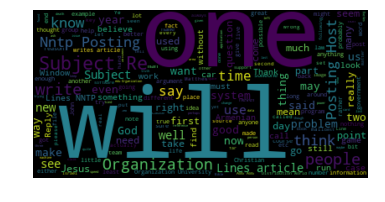

In [110]:
%matplotlib inline

# Start with one review:
text = d_

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

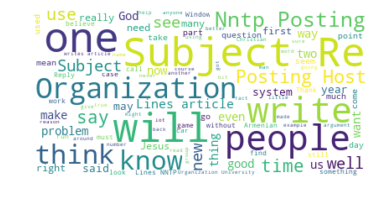

In [111]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [112]:
# Save the image:
wordcloud.to_file("wc1.png");

In [113]:
mask = np.array(Image.open("jour.jpg")) # Searched "journalism black png" on google images...

FileNotFoundError: [Errno 2] No such file or directory: 'jour.jpg'

In [114]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               stopwords=stopwords)

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'mask' is not defined

## Animations:

In [115]:
from matplotlib.animation import FuncAnimation

In [116]:
?FuncAnimation#(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs)

Makes an animation by repeatedly calling a function ``func``.

### Parameters
fig : matplotlib.figure.Figure
   The figure object that is used to get draw, resize, and any
   other needed events.

func : callable
   The function to call at each frame.  The first argument will
   be the next value in ``frames``.   Any additional positional
   arguments can be supplied via the ``fargs`` parameter.

   The required signature is::

      def func(frame, *fargs) -> iterable_of_artists:

frames : iterable, int, generator function, or None, optional
    Source of data to pass ``func`` and each frame of the animation

    If an iterable, then simply use the values provided.  If the
    iterable has a length, it will override the ``save_count`` kwarg.

    If an integer, then equivalent to passing ``range(frames)``

    If a generator function, then must have the signature::

       def gen_function() -> obj:

    If ``None``, then equivalent to passing ``itertools.count``.

    In all of these cases, the values in *frames* is simply passed through
    to the user-supplied *func* and thus can be of any type.

init_func : callable, optional
   A function used to draw a clear frame. If not given, the
   results of drawing from the first item in the frames sequence
   will be used. This function will be called once before the
   first frame.

   If ``blit == True``, ``init_func`` must return an iterable of artists
   to be re-drawn.

   The required signature is::

      def init_func() -> iterable_of_artists:

fargs : tuple or None, optional
   Additional arguments to pass to each call to *func*.

save_count : int, optional
   The number of values from *frames* to cache.

interval : number, optional
   Delay between frames in milliseconds.  Defaults to 200.

repeat_delay : number, optional
   If the animation in repeated, adds a delay in milliseconds
   before repeating the animation.  Defaults to ``None``.

repeat : bool, optional
   Controls whether the animation should repeat when the sequence
   of frames is completed.  Defaults to ``True``.

blit : bool, optional
   Controls whether blitting is used to optimize drawing. Note: when using
   blitting any animated artists will be drawn according to their zorder.
   However, they will be drawn on top of any previous artists, regardless
   of their zorder.  Defaults to ``False``.

In [117]:
%matplotlib notebook

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128), init_func=init, blit=True)

ani.save('FuncAnim.gif', writer='pillow', fps=60)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


#### Decay

This example showcases: 
- using a generator to drive an animation, 
- changing axes limits during an animation.

In [118]:
%matplotlib notebook

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)

<IPython.core.display.Javascript object>

#### The Bayes update
This animation displays the posterior estimate updates as it is refitted when new data arrives. The vertical line represents the theoretical value to which the plotted distribution should converge.

In [119]:
%matplotlib notebook
import math

def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)
plt.show()

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

#### Oscilloscope
Emulates an oscilloscope.

In [120]:
%matplotlib notebook
from matplotlib.lines import Line2D


class Scope(object):
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = FuncAnimation(fig, scope.update, emitter, interval=10,
                              blit=True)

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>